In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import AutoMinorLocator
from scipy.stats import t as t_dist

from functions import *
from config import (MATPLOTLIB_PARAMS)

plt.rcParams.update(MATPLOTLIB_PARAMS)

# BENCHMARKS - Isolated 

In [2]:
df_kems = kem_data_process("data/kem_bench_oqs_100_iter_20250124.csv")

df_kems

Algorithm  Iteration  KeyGen(ms)  Encaps(ms)  Decaps(ms)  \
0     frodo640aes          1       5.065       0.694       0.626   
1     frodo640aes          2       0.502       0.652       0.611   
2     frodo640aes          3       0.465       0.741       0.805   
3     frodo640aes          4       0.596       0.804       0.618   
4     frodo640aes          5       0.472       0.683       0.612   
...           ...        ...         ...         ...         ...   
5195       hqc256         96       6.270      12.647      19.530   
5196       hqc256         97       6.250      12.702      19.538   
5197       hqc256         98       6.249      12.647      19.514   
5198       hqc256         99       6.243      12.655      19.531   
5199       hqc256        100       6.258      12.648      19.522   

      TotalTime(ms)  
0             6.385  
1             1.765  
2             2.011  
3             2.018  
4             1.767  
...             ...  
5195         38.447  
5196         38.490  
5197         38.410  
5198         38.429  
5199         38.428  

[1800 rows x 6 columns]

In [3]:
df_qkdkems = kem_data_process("data/kem_bench_qkdkemprovider_100_iter_20250124.csv")

df_qkdkems

Algorithm  Iteration  KeyGen(ms)  Encaps(ms)  Decaps(ms)  \
0     qkd_frodo640aes          1       4.620       0.738       0.678   
1     qkd_frodo640aes          2       0.612       0.704       0.611   
2     qkd_frodo640aes          3       0.553       0.759       0.643   
3     qkd_frodo640aes          4       0.676       0.708       0.635   
4     qkd_frodo640aes          5       0.560       0.695       0.620   
...               ...        ...         ...         ...         ...   
1795       qkd_hqc256         96       8.359      16.796      25.868   
1796       qkd_hqc256         97       8.329      16.774      25.857   
1797       qkd_hqc256         98       8.338      16.729      25.803   
1798       qkd_hqc256         99       8.313      16.788      25.866   
1799       qkd_hqc256        100       8.358      16.779      25.851   

      TotalTime(ms)  
0             6.036  
1             1.927  
2             1.955  
3             2.019  
4             1.875  
...             ...  
1795         51.023  
1796         50.960  
1797         50.870  
1798         50.967  
1799         50.988  

[1800 rows x 6 columns]

In [4]:
# Count unique algorithms with
std_algorithms = df_kems['Algorithm'].unique()

print(f"Number of distinct algorithms: {len(std_algorithms)}")
print("\nPQC Algorithms found:")
for algo in sorted(std_algorithms):
    print(f"- {algo}")

Number of distinct algorithms: 18

PQC Algorithms found:
- bikel1
- bikel3
- bikel5
- frodo1344aes
- frodo1344shake
- frodo640aes
- frodo640shake
- frodo976aes
- frodo976shake
- hqc128
- hqc192
- hqc256
- kyber1024
- kyber512
- kyber768
- mlkem1024
- mlkem512
- mlkem768


In [5]:
# Count unique algorithms with qkd_ prefix
qkd_algorithms = df_qkdkems[df_qkdkems['Algorithm'].str.startswith('qkd_')]['Algorithm'].unique()

print(f"Number of distinct QKD algorithms: {len(qkd_algorithms)}")
print("\nQKD-PQC algorithms found:")
for algo in sorted(qkd_algorithms):
    print(f"- {algo}")

Number of distinct QKD algorithms: 18

QKD-PQC algorithms found:
- qkd_bikel1
- qkd_bikel3
- qkd_bikel5
- qkd_frodo1344aes
- qkd_frodo1344shake
- qkd_frodo640aes
- qkd_frodo640shake
- qkd_frodo976aes
- qkd_frodo976shake
- qkd_hqc128
- qkd_hqc192
- qkd_hqc256
- qkd_kyber1024
- qkd_kyber512
- qkd_kyber768
- qkd_mlkem1024
- qkd_mlkem512
- qkd_mlkem768


In [6]:
df_kems_stats = kem_data_summary(df_kems, warmup=2)

df_kems_stats

NumIterations  KeyGen(ms)_mean  KeyGen(ms)_std  \
Algorithm                                                        
bikel1                     98            0.209           0.017   
bikel3                     98            0.580           0.016   
bikel5                     98            1.394           0.017   
frodo1344aes               98            0.676           0.005   
frodo1344shake             98            3.276           0.492   
frodo640aes                98            0.468           0.016   
frodo640shake              98            1.006           0.071   
frodo976aes                98            0.532           0.008   
frodo976shake              98            2.127           0.018   
hqc128                     98            1.488           0.030   
hqc192                     98            4.018           1.050   
hqc256                     98            6.973           1.107   
kyber1024                  98            0.019           0.000   
kyber512                   98            0.010           0.004   
kyber768                   98            0.014           0.001   
mlkem1024                  98            0.022           0.008   
mlkem512                   98            0.011           0.004   
mlkem768                   98            0.014           0.000   

                KeyGen(ms)_min  KeyGen(ms)_max  Encaps(ms)_mean  \
Algorithm                                                         
bikel1                   0.201           0.333            0.037   
bikel3                   0.563           0.646            0.084   
bikel5                   1.372           1.462            0.166   
frodo1344aes             0.671           0.712            0.870   
frodo1344shake           2.877           4.398            4.054   
frodo640aes              0.457           0.596            0.657   
frodo640shake            0.970           1.262            1.084   
frodo976aes              0.521           0.566            0.685   
frodo976shake            2.112           2.254            2.242   
hqc128                   1.472           1.771            2.993   
hqc192                   3.405           7.959            8.169   
hqc256                   6.239          10.340           14.078   
kyber1024                0.019           0.021            0.024   
kyber512                 0.008           0.032            0.012   
kyber768                 0.013           0.016            0.016   
mlkem1024                0.019           0.049            0.021   
mlkem512                 0.009           0.022            0.010   
mlkem768                 0.014           0.016            0.013   

                Encaps(ms)_std  Encaps(ms)_min  Encaps(ms)_max  \
Algorithm                                                        
bikel1                   0.002           0.036           0.049   
bikel3                   0.004           0.081           0.108   
bikel5                   0.006           0.160           0.190   
frodo1344aes             0.007           0.862           0.893   
frodo1344shake           0.510           3.597           5.144   
frodo640aes              0.020           0.643           0.804   
frodo640shake            0.075           1.045           1.360   
frodo976aes              0.006           0.676           0.706   
frodo976shake            0.055           2.228           2.782   
hqc128                   0.007           2.978           3.031   
hqc192                   2.176           6.865          15.994   
hqc256                   2.153          12.584          19.655   
kyber1024                0.009           0.023           0.102   
kyber512                 0.004           0.010           0.024   
kyber768                 0.001           0.015           0.020   
mlkem1024                0.008           0.018           0.052   
mlkem512                 0.004           0.008           0.020   
mlkem768                 0.001           0.013           0.019   

                Decaps(ms)_mean  

In [7]:
df_qkdkems_stats = kem_data_summary(df_qkdkems, warmup=2)

df_qkdkems_stats

NumIterations  KeyGen(ms)_mean  KeyGen(ms)_std  \
Algorithm                                                            
qkd_bikel1                     98            0.191           0.017   
qkd_bikel3                     98            0.464           0.010   
qkd_bikel5                     98            1.087           0.024   
qkd_frodo1344aes               98            0.927           0.028   
qkd_frodo1344shake             98            3.582           0.681   
qkd_frodo640aes                98            0.531           0.030   
qkd_frodo640shake              98            1.735           0.097   
qkd_frodo976aes                98            0.579           0.060   
qkd_frodo976shake              98            2.157           0.010   
qkd_hqc128                     98            1.404           0.167   
qkd_hqc192                     98            4.545           0.018   
qkd_hqc256                     98            8.335           0.267   
qkd_kyber1024                  98            0.037           0.002   
qkd_kyber512                   98            0.035           0.004   
qkd_kyber768                   98            0.039           0.004   
qkd_mlkem1024                  98            0.036           0.003   
qkd_mlkem512                   98            0.028           0.003   
qkd_mlkem768                   98            0.031           0.001   

                    KeyGen(ms)_min  KeyGen(ms)_max  Encaps(ms)_mean  \
Algorithm                                                             
qkd_bikel1                   0.175           0.267            0.048   
qkd_bikel3                   0.452           0.513            0.082   
qkd_bikel5                   1.058           1.182            0.147   
qkd_frodo1344aes             0.908           1.088            1.188   
qkd_frodo1344shake           2.880           4.951            4.397   
qkd_frodo640aes              0.509           0.676            0.700   
qkd_frodo640shake            1.392           2.045            1.859   
qkd_frodo976aes              0.539           0.790            0.750   
qkd_frodo976shake            2.139           2.193            2.273   
qkd_hqc128                   1.136           1.576            2.806   
qkd_hqc192                   4.519           4.641            9.107   
qkd_hqc256                   8.260          10.377           16.866   
qkd_kyber1024                0.035           0.048            0.037   
qkd_kyber512                 0.033           0.062            0.034   
qkd_kyber768                 0.036           0.052            0.039   
qkd_mlkem1024                0.035           0.059            0.033   
qkd_mlkem512                 0.026           0.041            0.026   
qkd_mlkem768                 0.030           0.039            0.029   

                    Encaps(ms)_std  Encaps(ms)_min  Encaps(ms)_max  \
Algorithm                                                            
qkd_bikel1                   0.003           0.046           0.064   
qkd_bikel3                   0.003           0.081           0.098   
qkd_bikel5                   0.008           0.142           0.182   
qkd_frodo1344aes             0.022           1.174           1.294   
qkd_frodo1344shake           0.714           3.630           5.398   
qkd_frodo640aes              0.016           0.686           0.810   
qkd_frodo640shake            0.100           1.498           2.054   
qkd_frodo976aes              0.077           0.701           1.115   
qkd_frodo976shake            0.007           2.258           2.314   
qkd_hqc128                   0.341           2.278           3.384   
qkd_hqc192                   0.056           9.061           9.603   
qkd_hqc256                   0.719          16.678          22.417   
qkd_kyber1024                0.002           0.036           0.046   
qkd_kyber512                 0.002           0.033           0.043   
qkd_kyber768                 0.004           0.037           0.065   
qkd_mlke

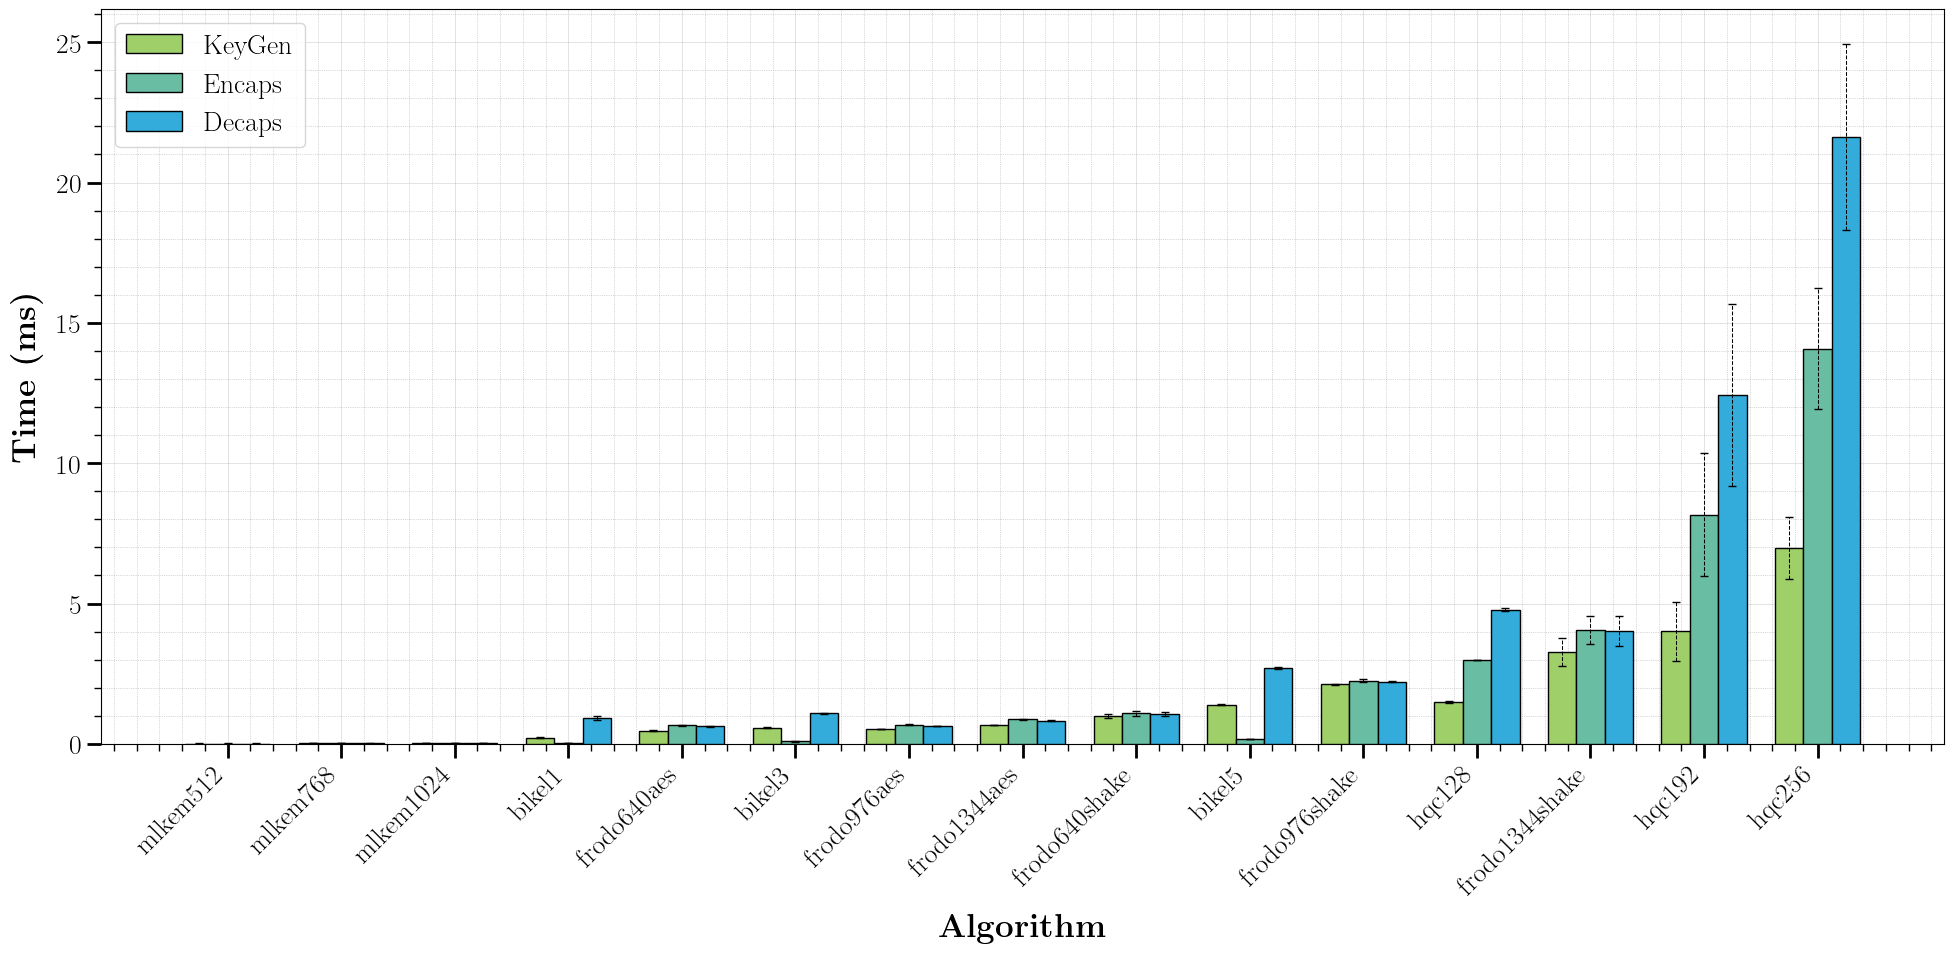

In [8]:
plot_kem_times(input_df=df_kems_stats, error_suffix="_std", plot_title="kems_ops_times.pdf", y_start=None)

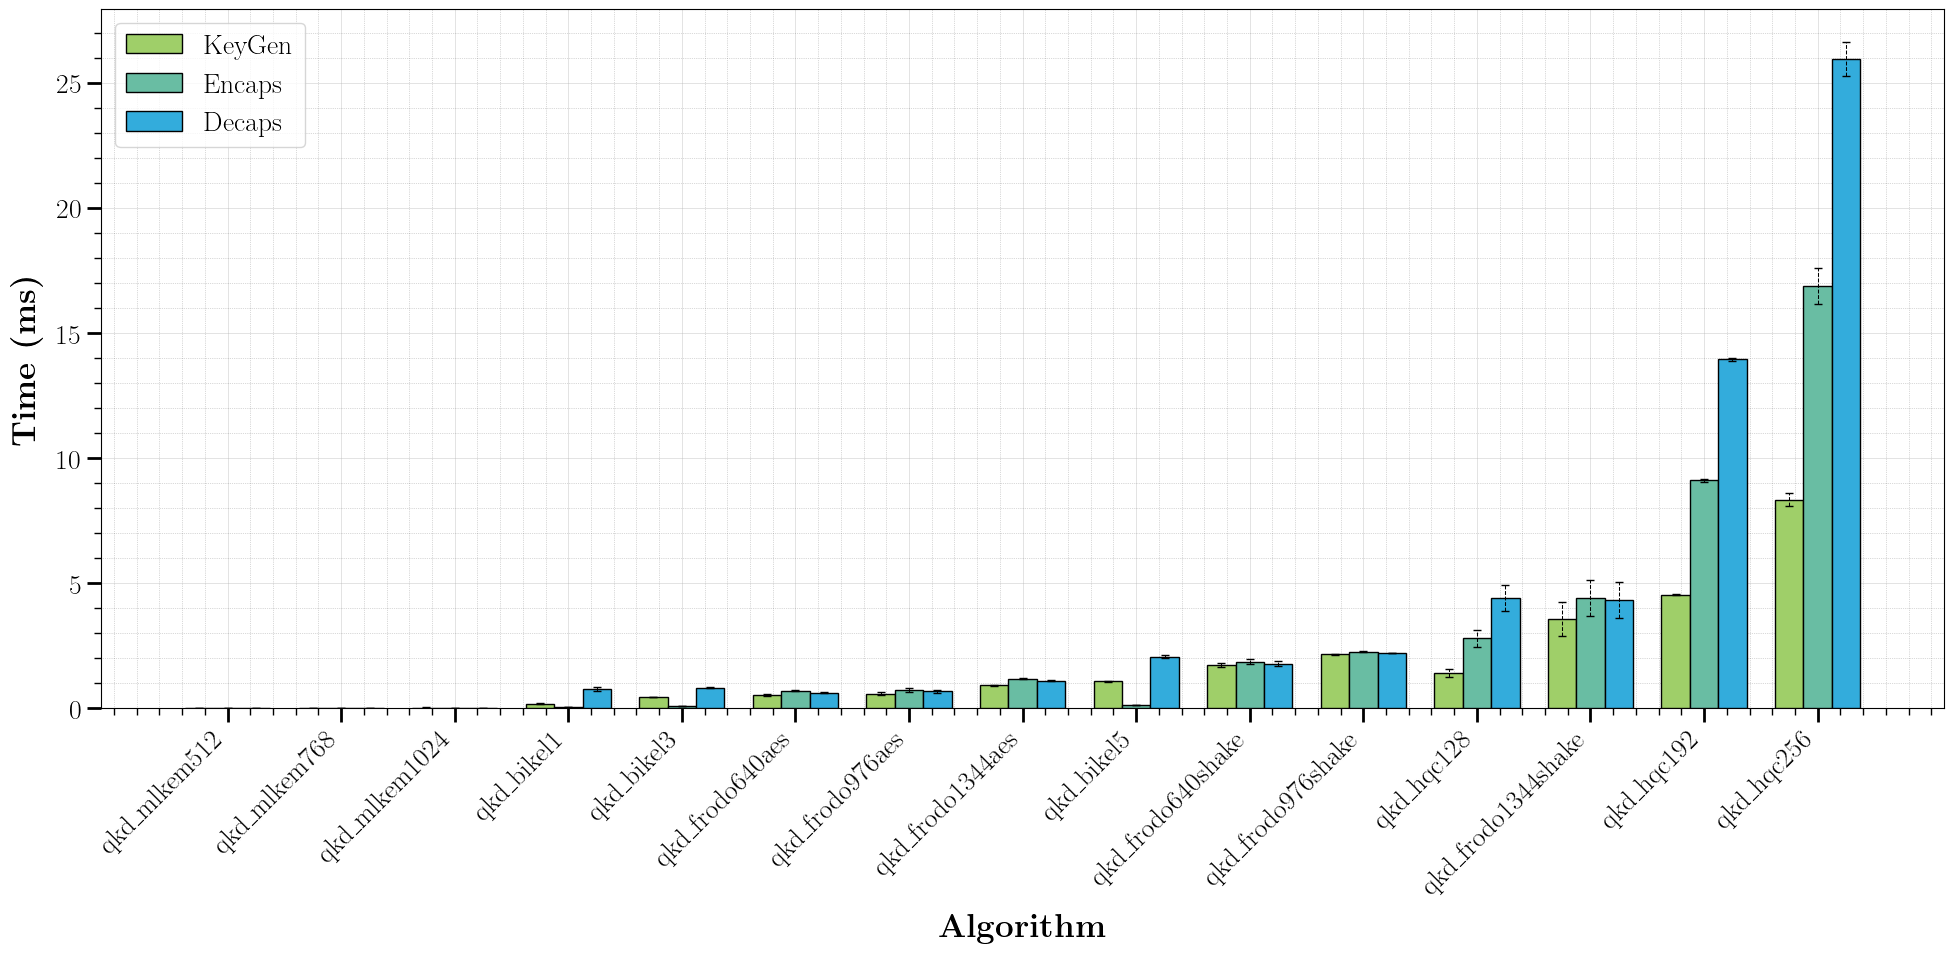

In [9]:
plot_kem_times(input_df=df_qkdkems_stats, error_suffix="_std", plot_title="qkdkems_ops_times.pdf", y_start=None)

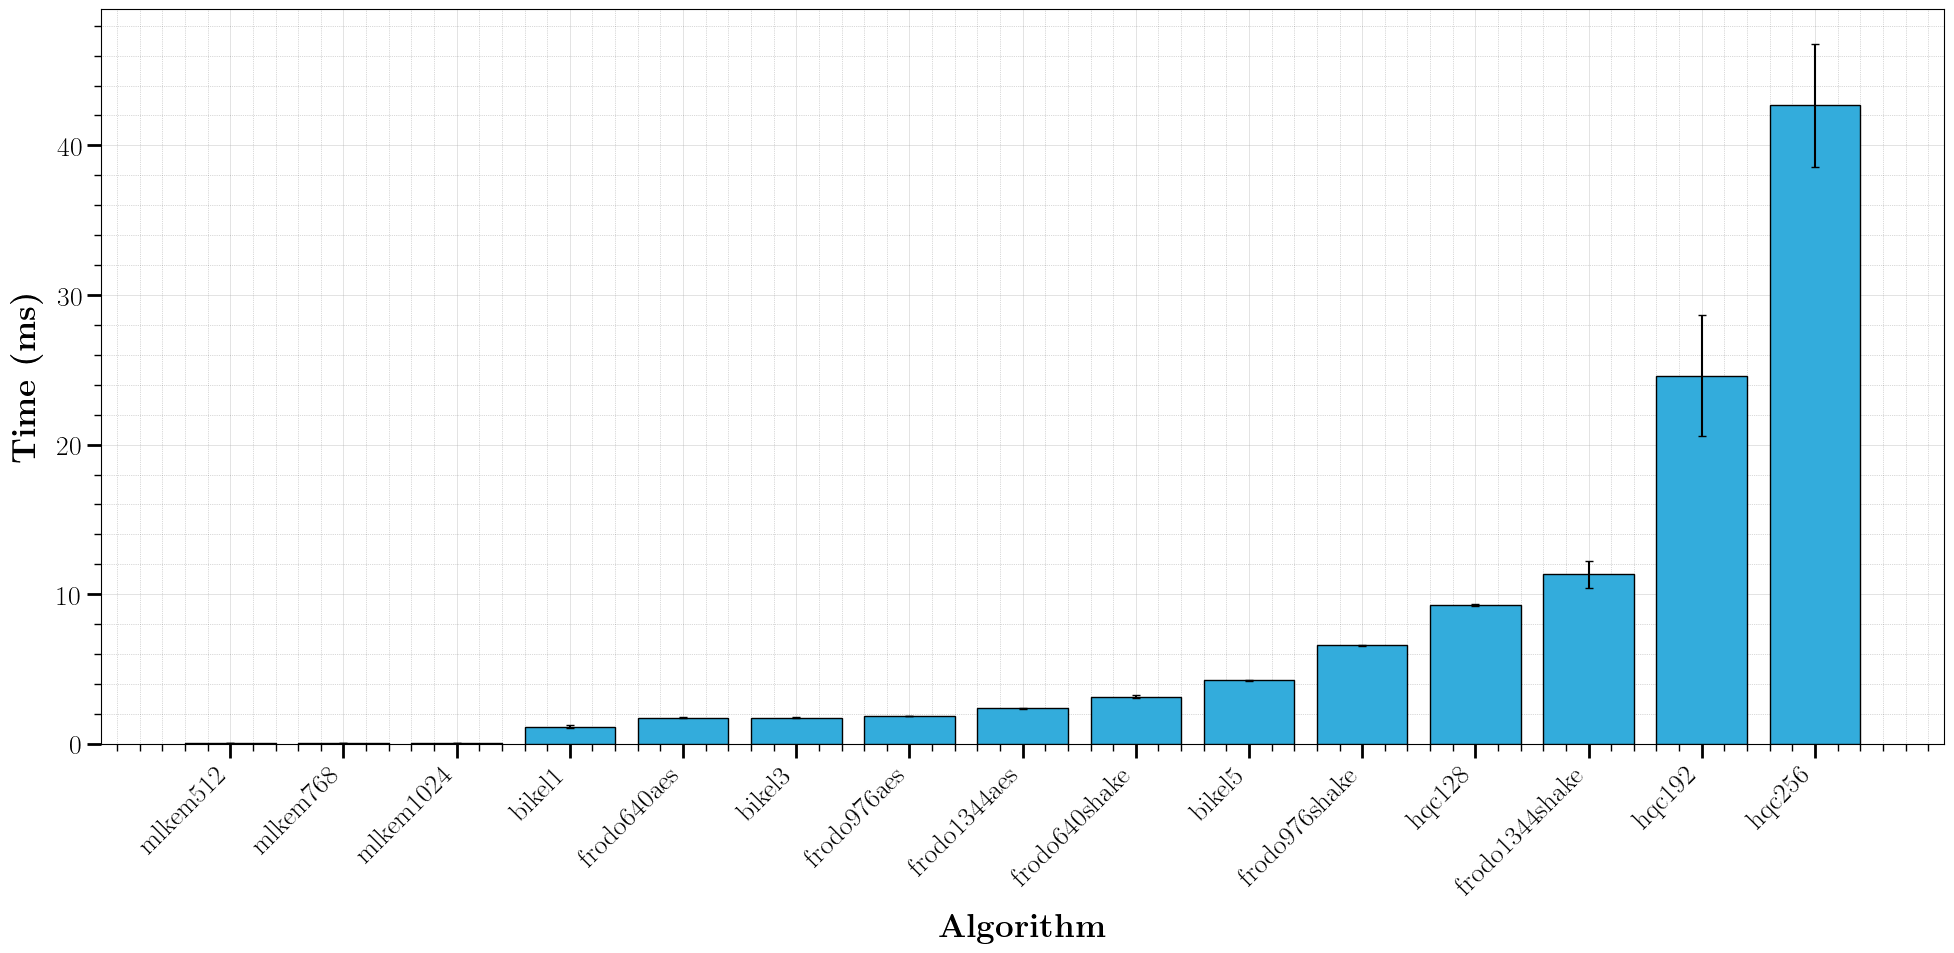

In [10]:
plot_kem_total_times(df_kems_stats, error_suffix="_std", plot_title="kems_total_times.pdf", y_start=None)

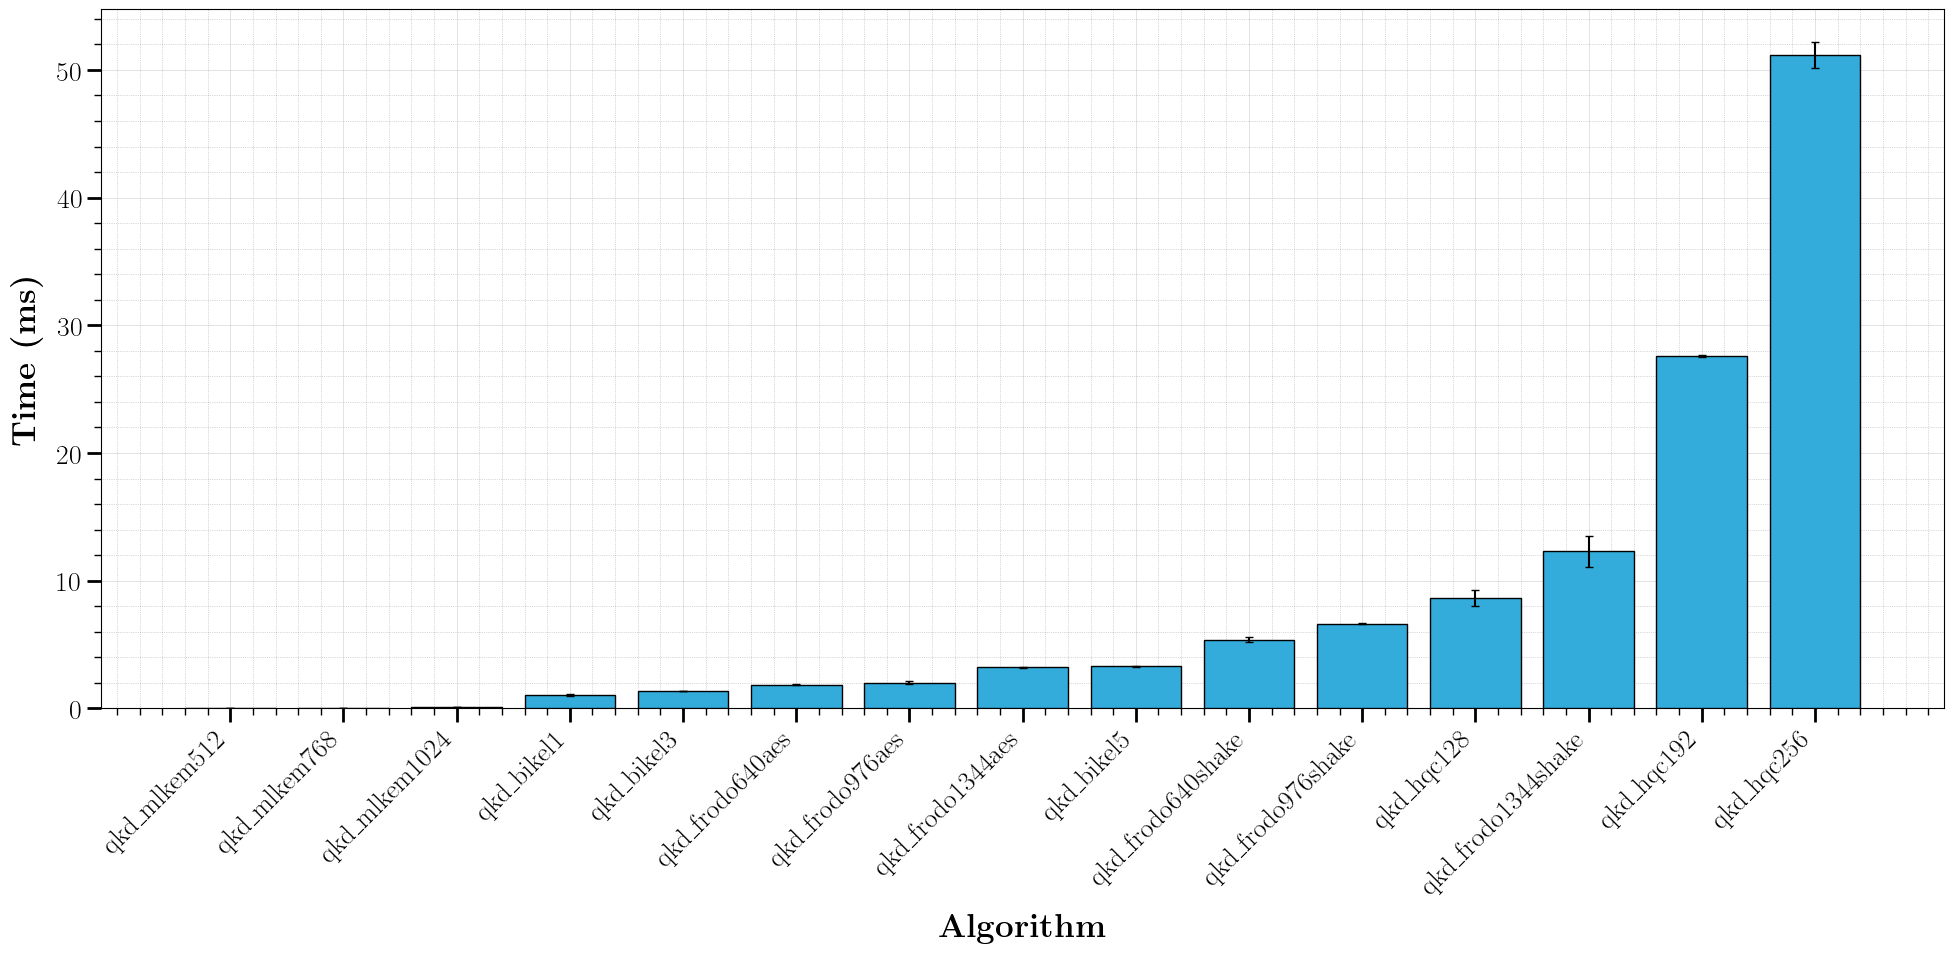

In [11]:
plot_kem_total_times(df_qkdkems_stats, error_suffix="_std", plot_title="qkdkems_total_times.pdf", y_start=None)

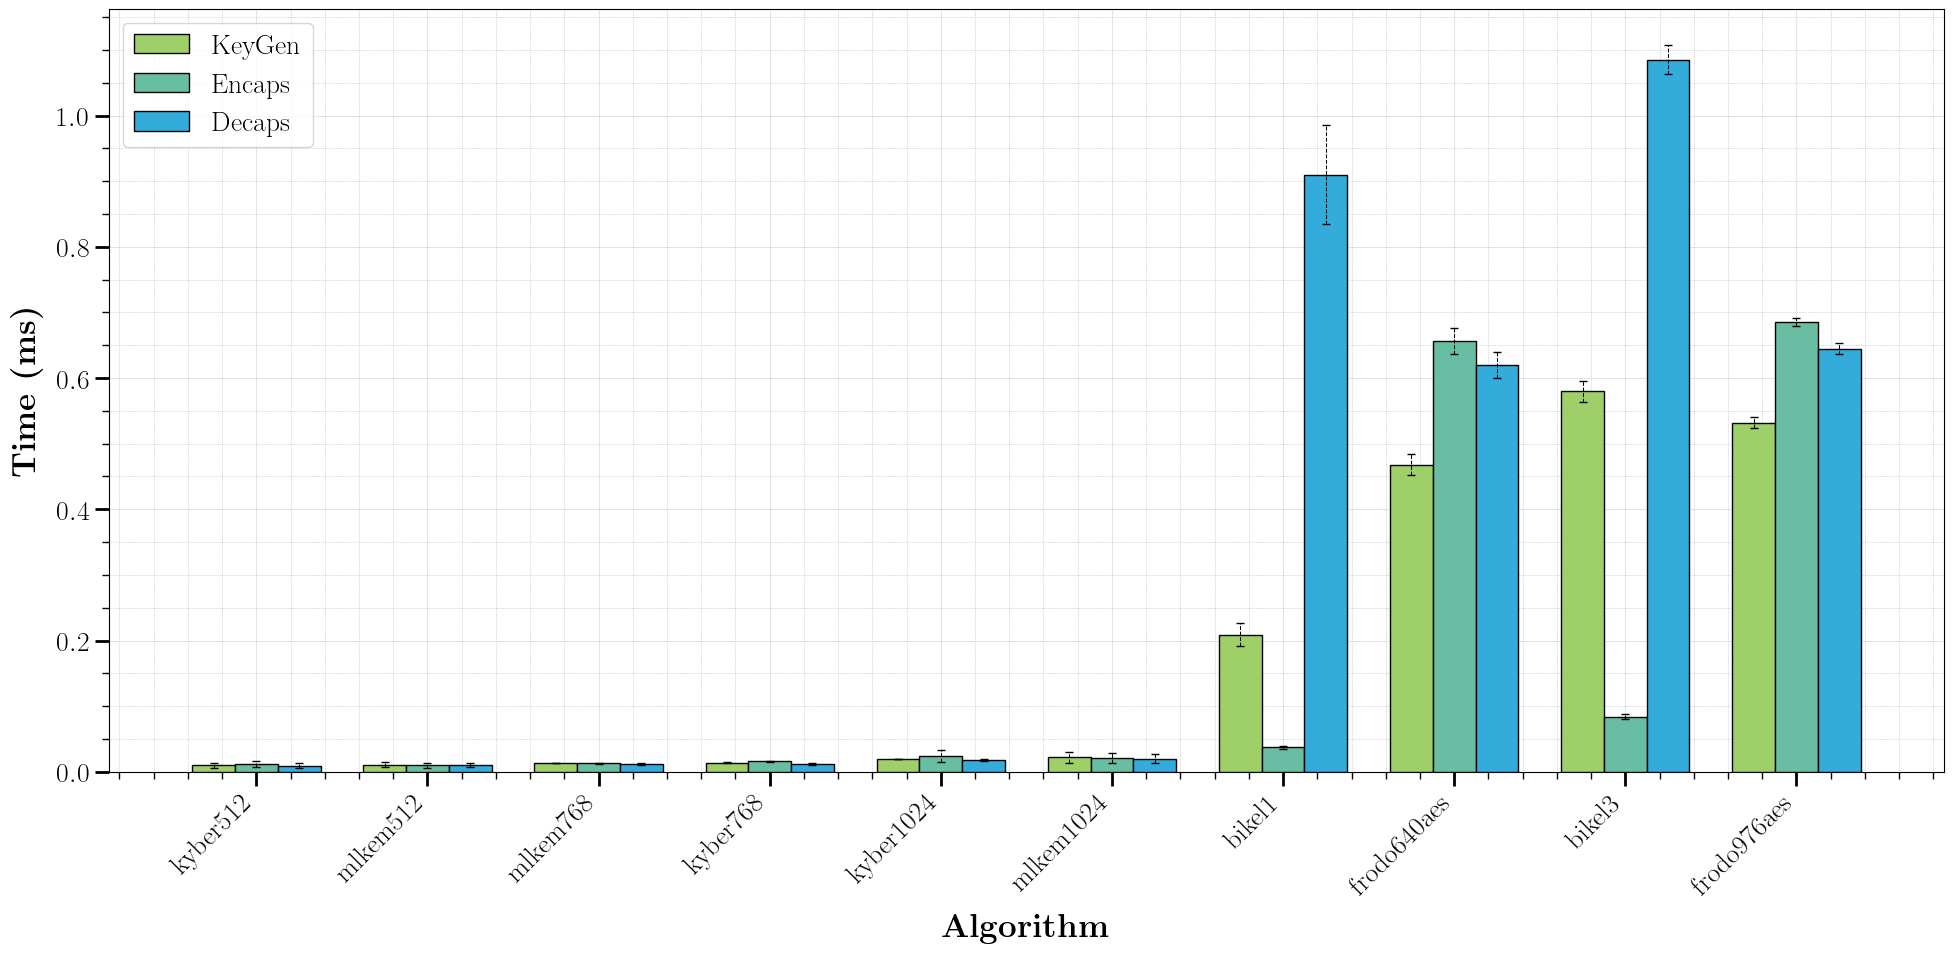

In [12]:
plot_kems_fast(input_df=df_kems_stats, error_suffix="_std", plot_title="kems_fast_times.pdf")

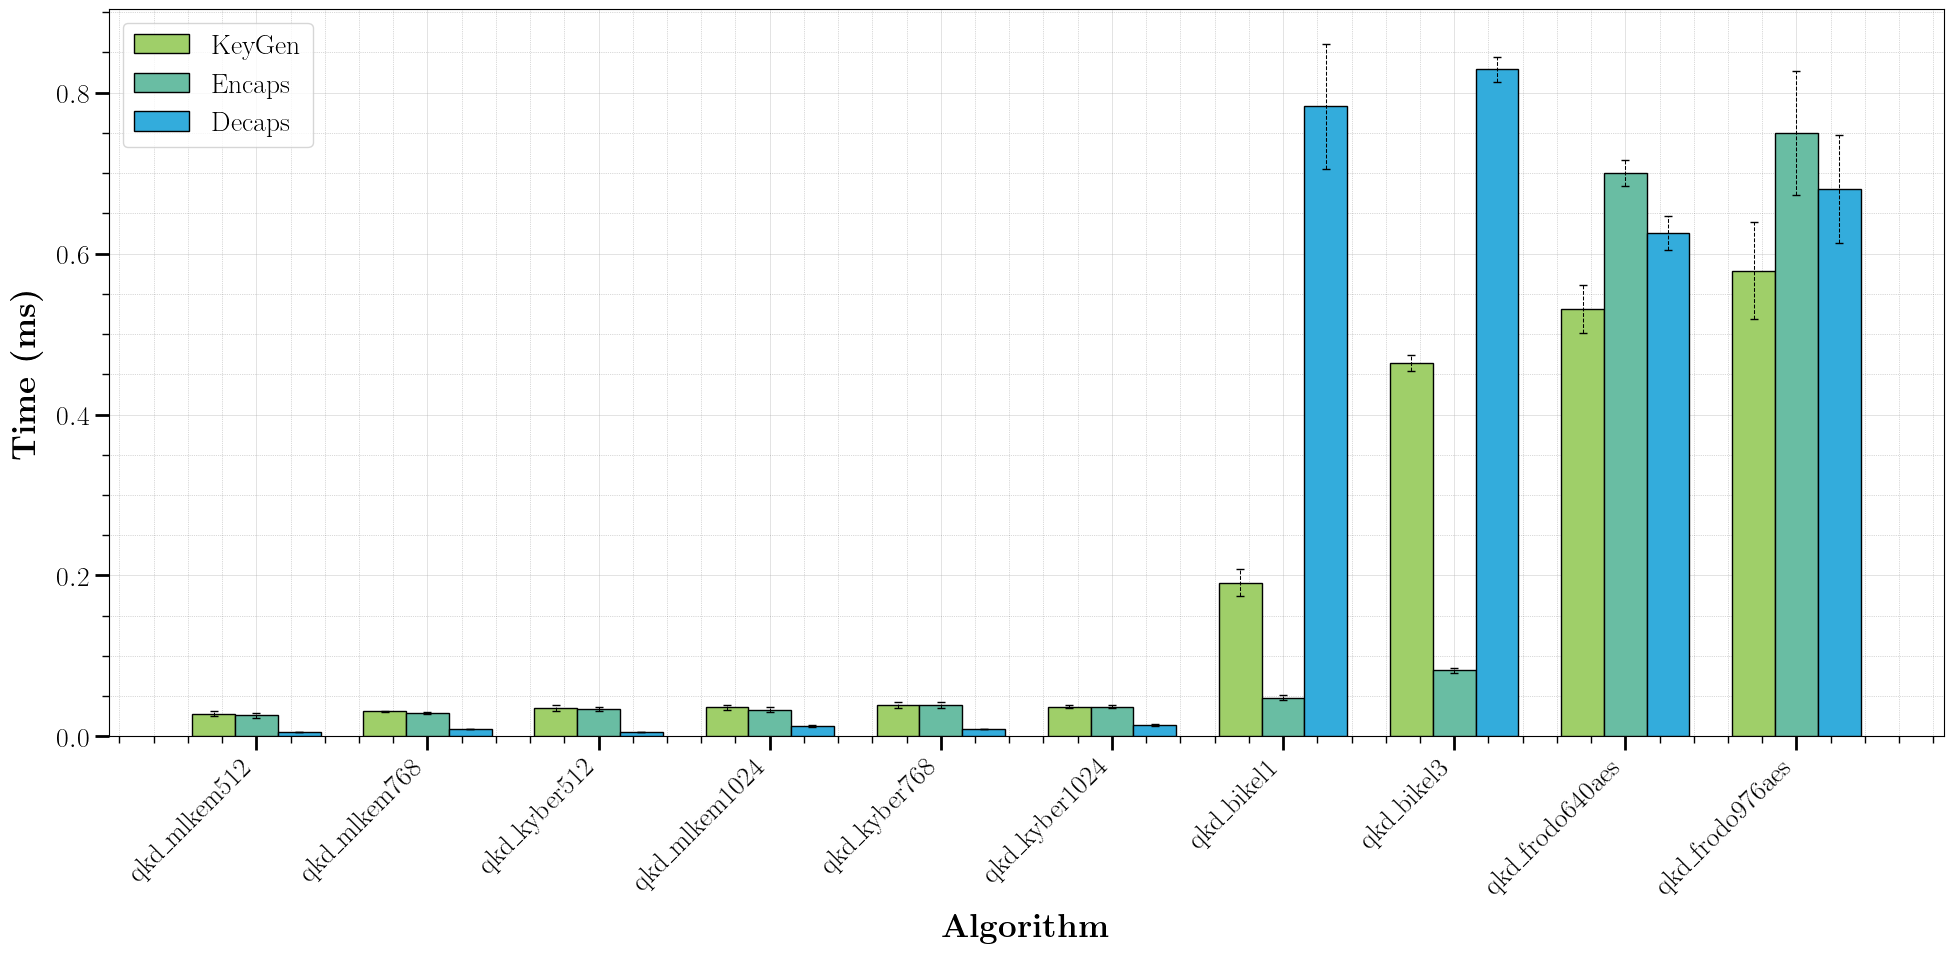

In [13]:
plot_kems_fast(input_df=df_qkdkems_stats, error_suffix="_std", plot_title="qkdkems_fast_times.pdf")

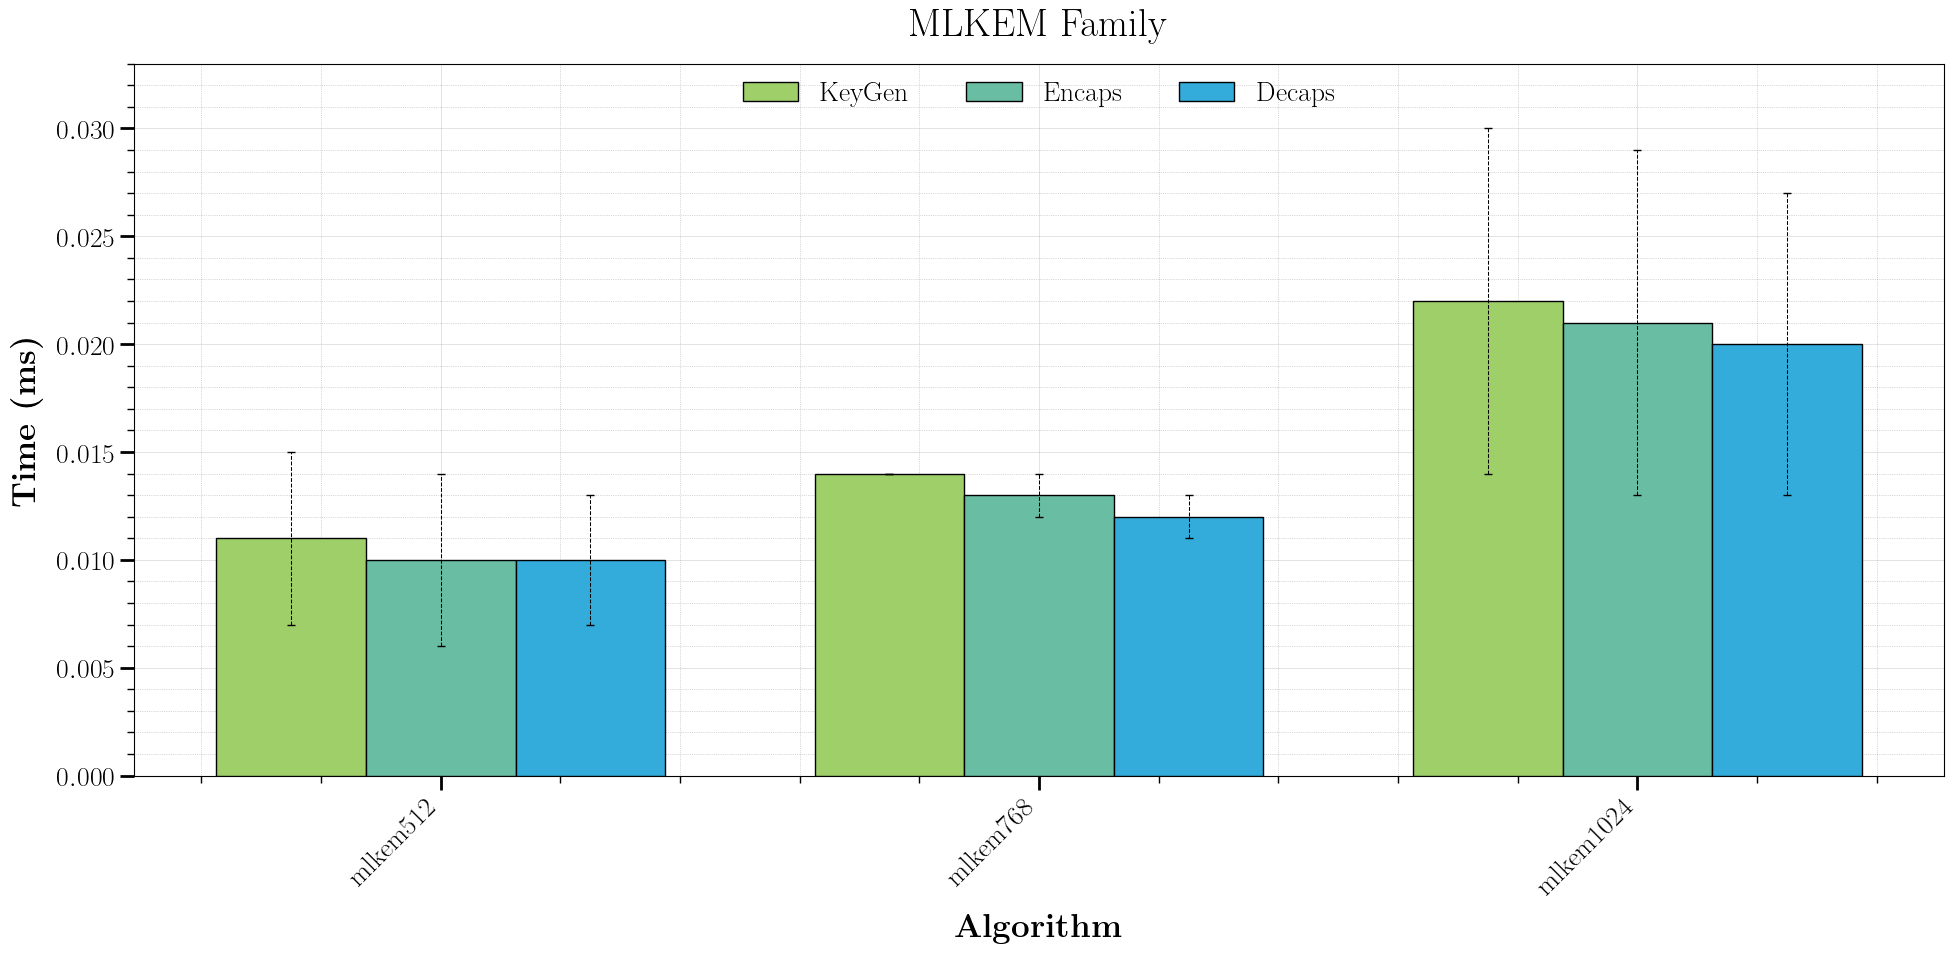

In [14]:
plot_kem_family(input_df=df_kems_stats, family='mlkem', error_suffix="_std", plot_title="kyber_times.pdf", log_scale=False)

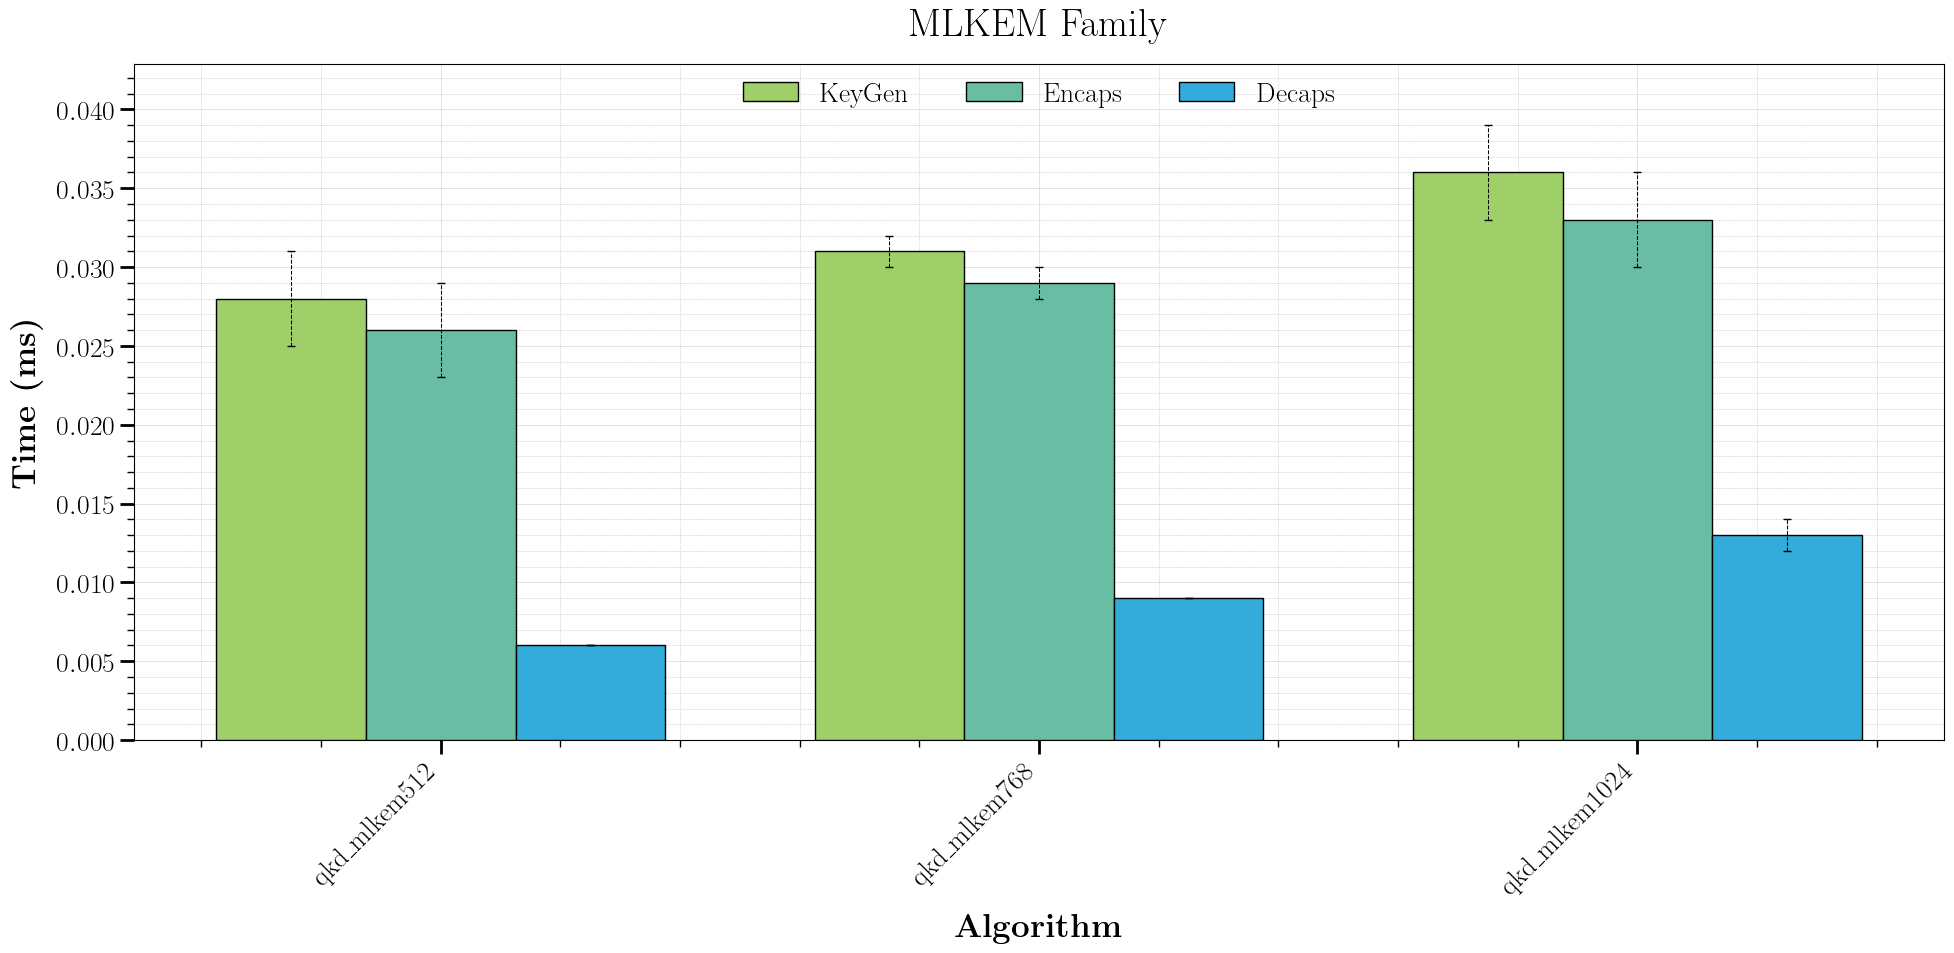

In [15]:
plot_kem_family(input_df=df_qkdkems_stats, family='mlkem', error_suffix="_std", plot_title="qkdkyber_times.pdf", log_scale=False)

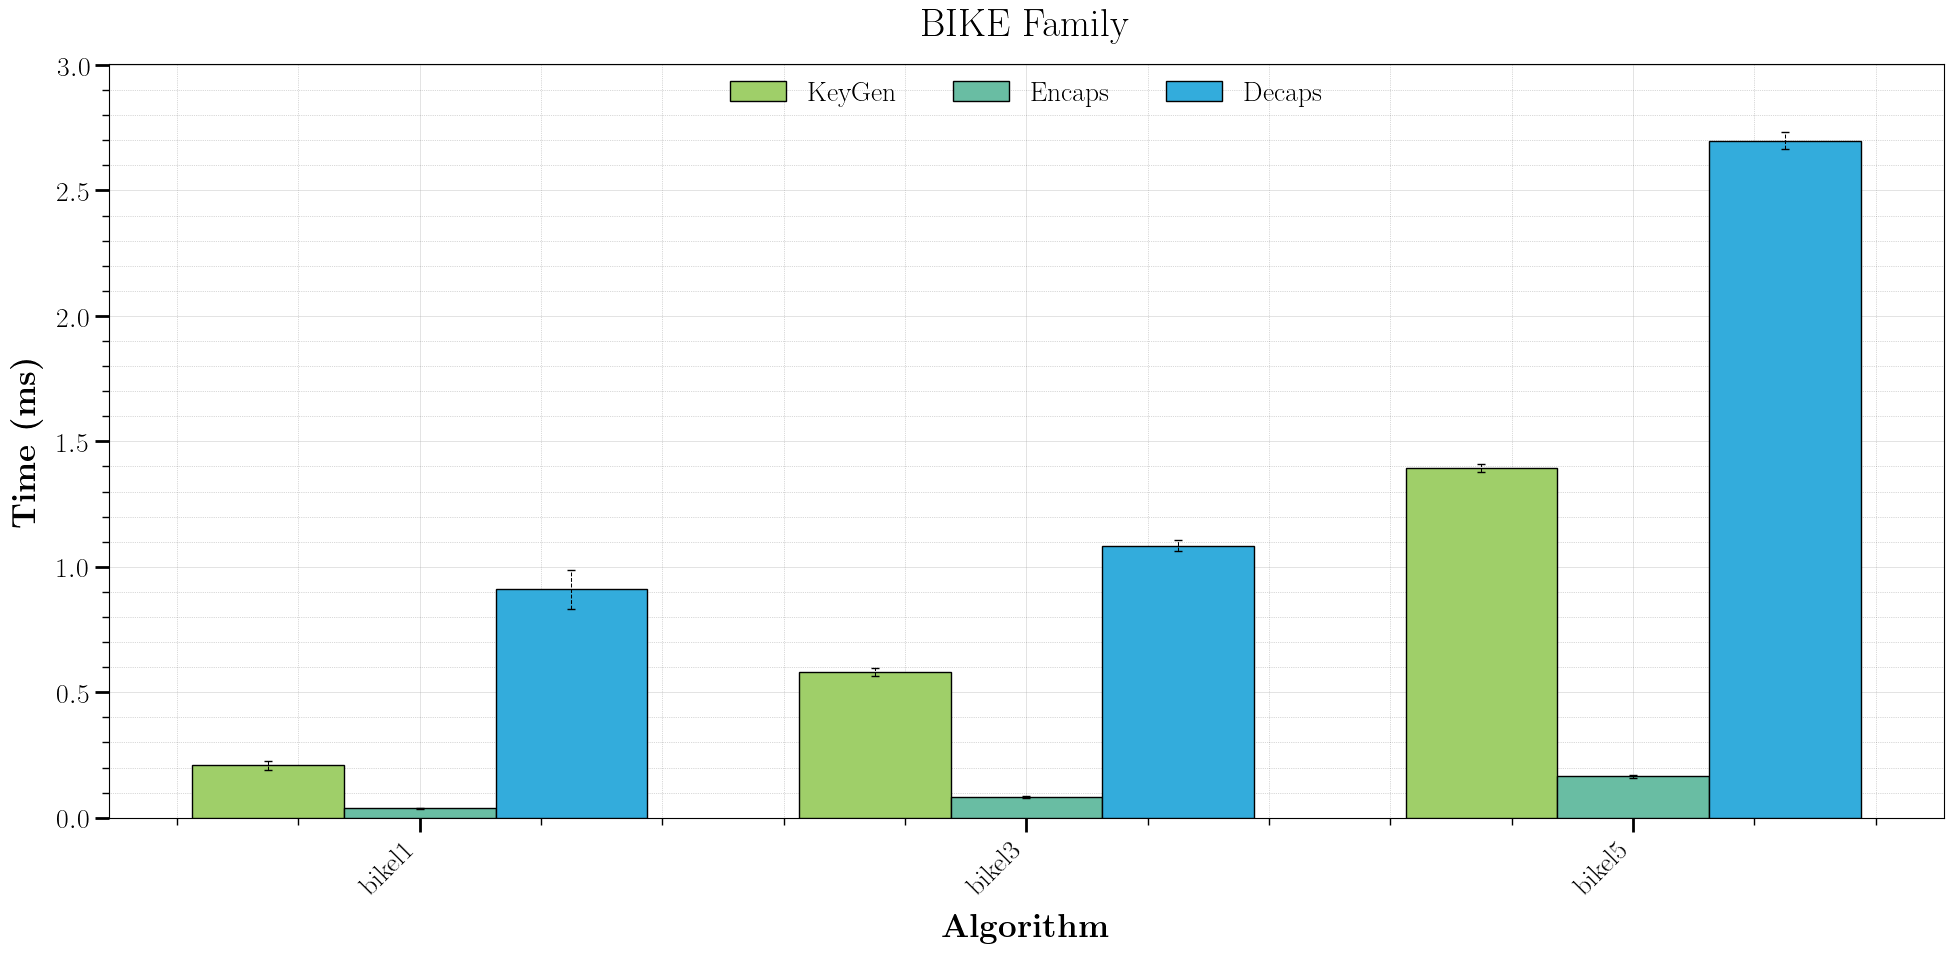

In [16]:
plot_kem_family(input_df=df_kems_stats, family='bike', error_suffix="_std", plot_title="bike_times.pdf", log_scale=False)

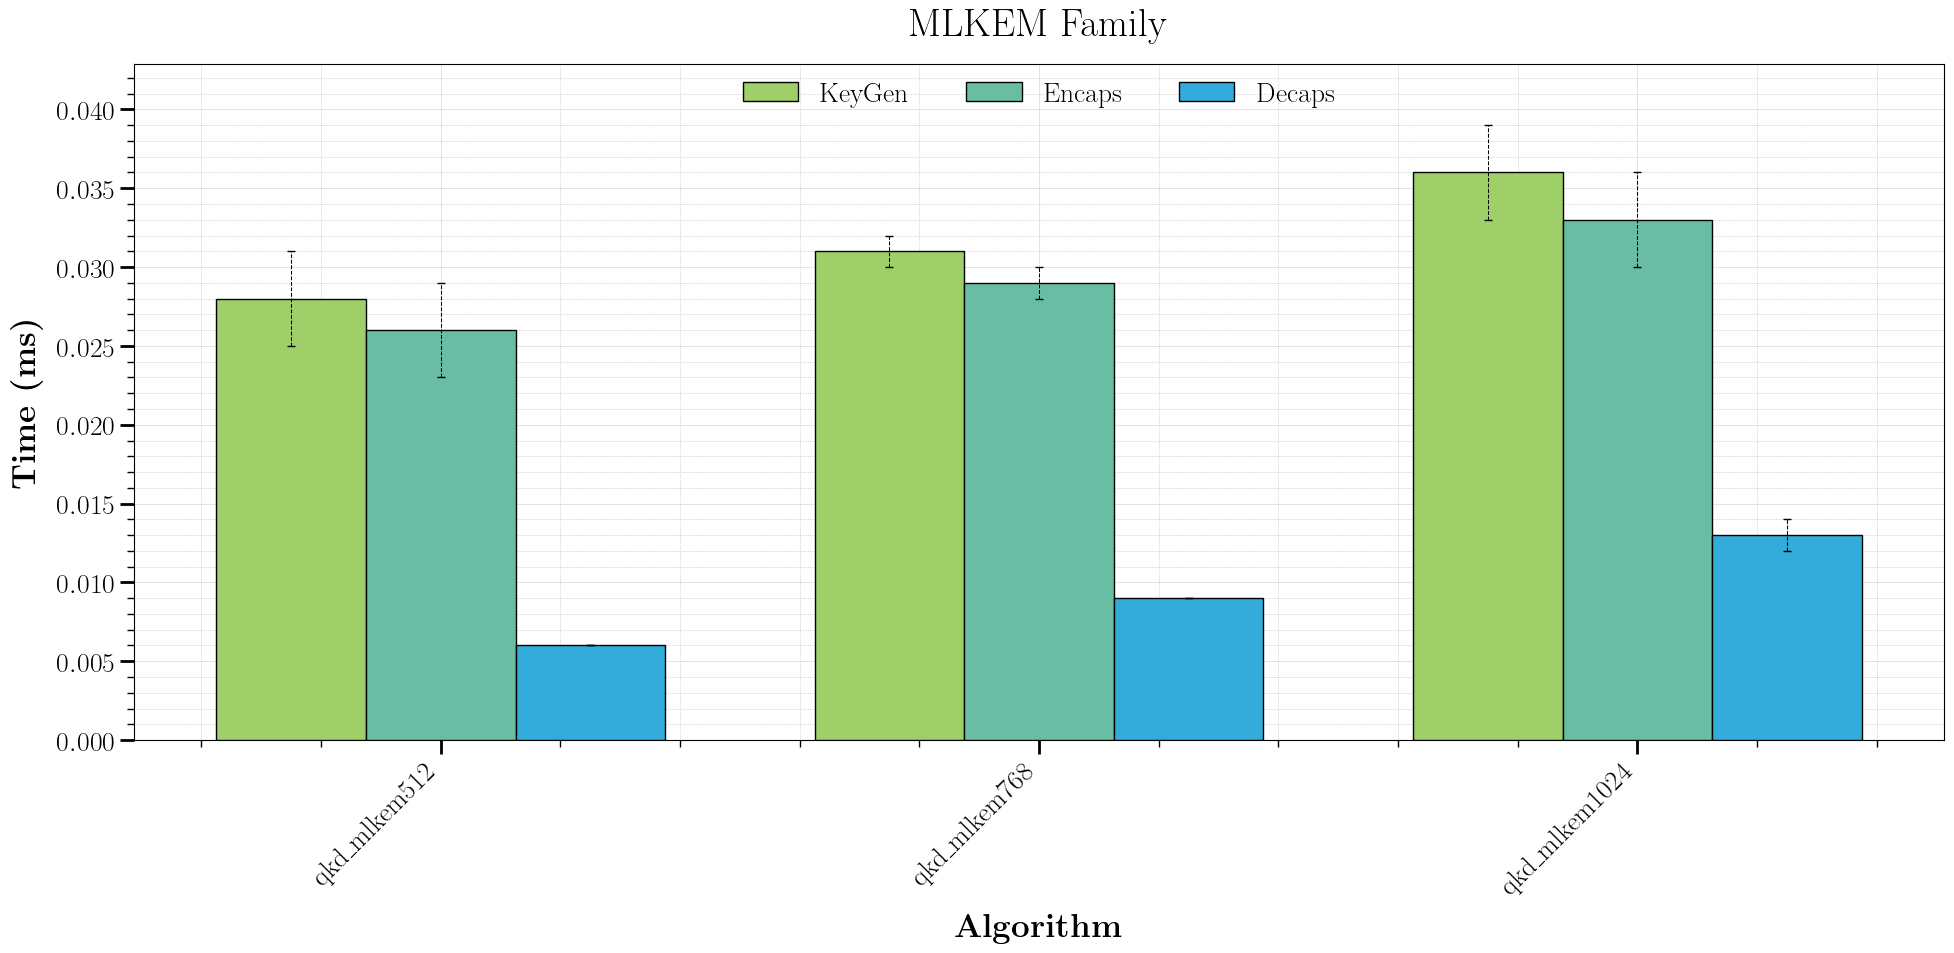

In [17]:
plot_kem_family(input_df=df_qkdkems_stats, family='mlkem', error_suffix="_std", plot_title="qkdmlkem_times.pdf", log_scale=False)

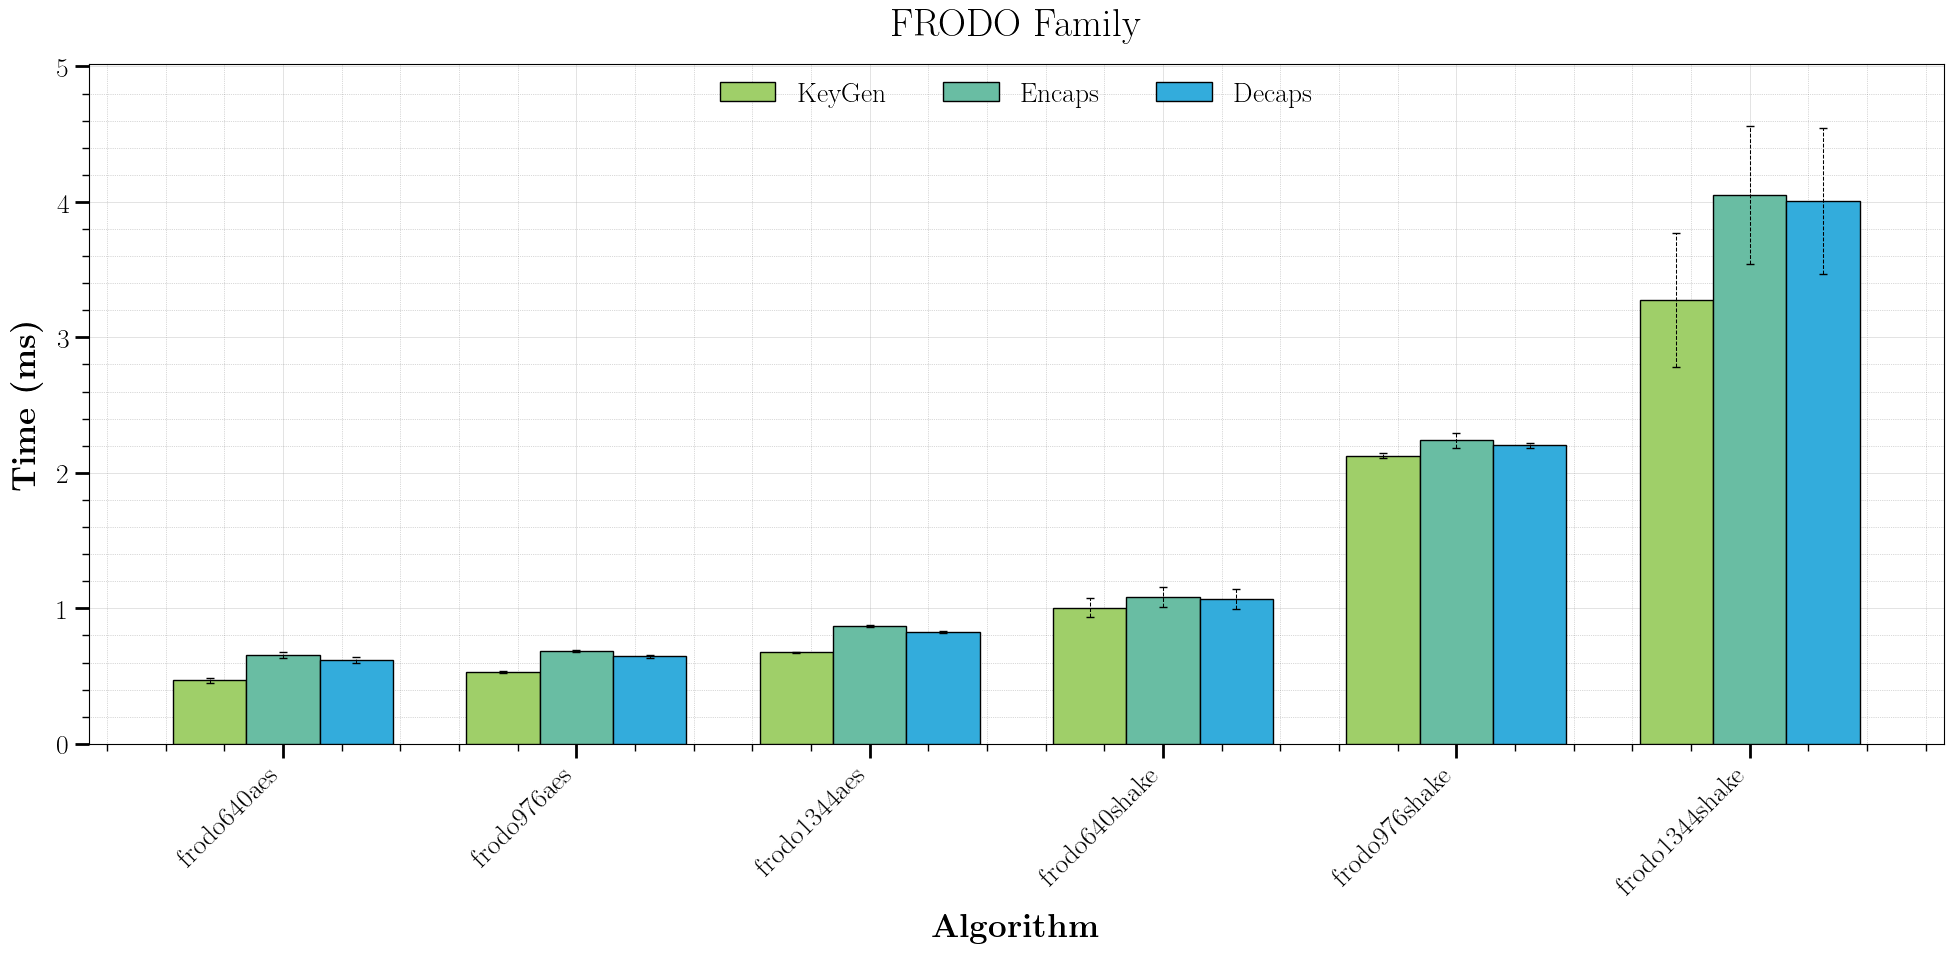

In [18]:
plot_kem_family(input_df=df_kems_stats, family='frodo', error_suffix="_std", plot_title="frodo_times.pdf", log_scale=False)

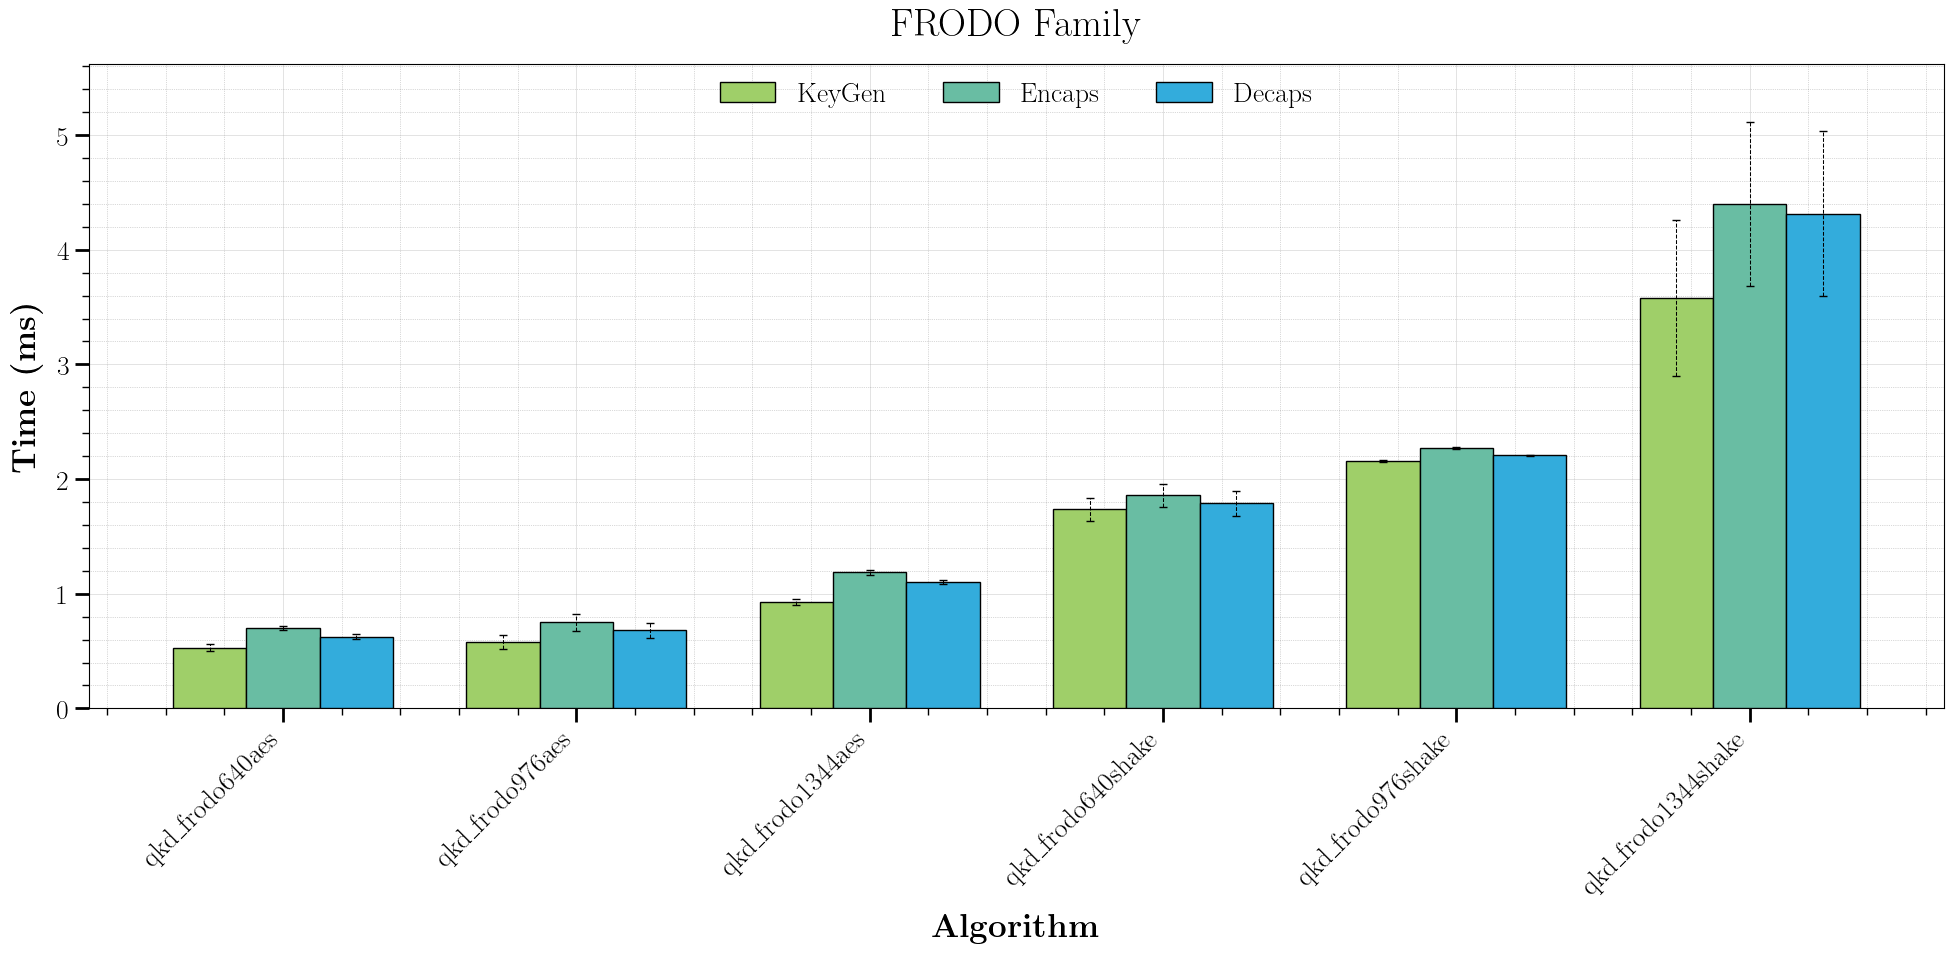

In [19]:
plot_kem_family(input_df=df_qkdkems_stats, family='frodo', error_suffix="_std", plot_title="qkdfrodo_times.pdf", log_scale=False)

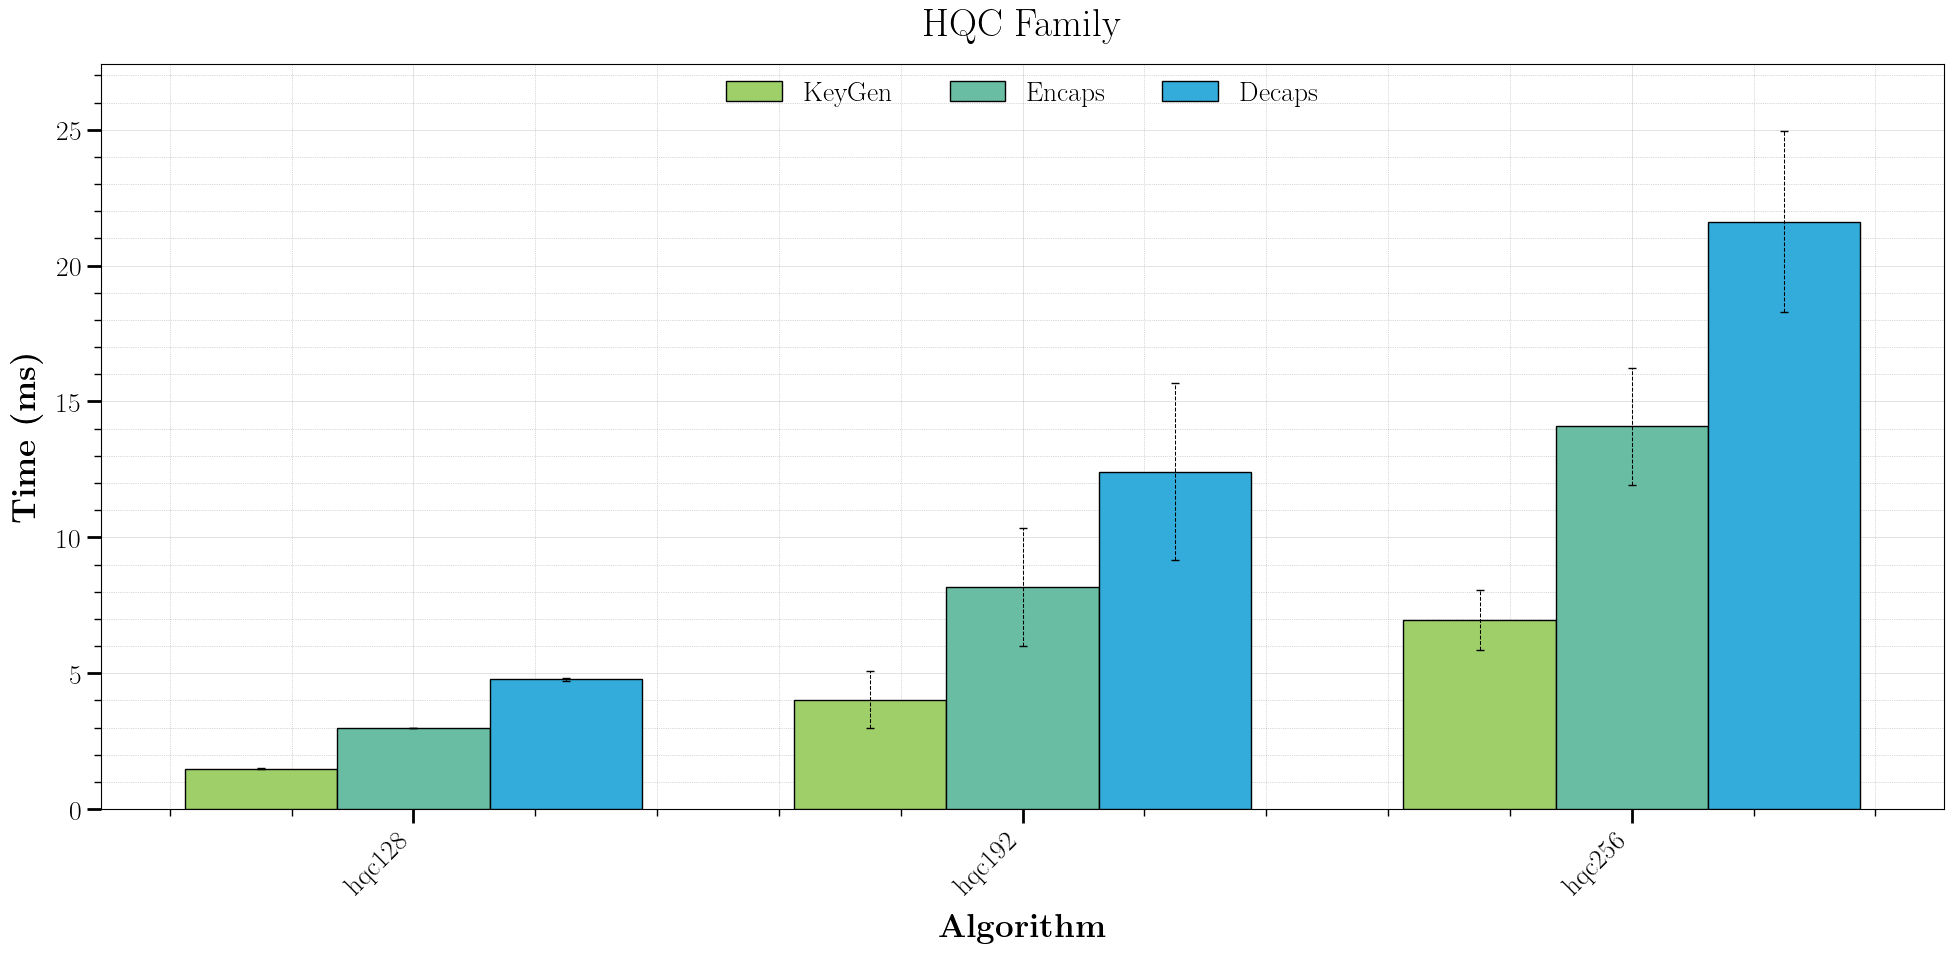

In [20]:
plot_kem_family(input_df=df_kems_stats, family='hqc', error_suffix="_std", plot_title="hqc_times.pdf", log_scale=False)

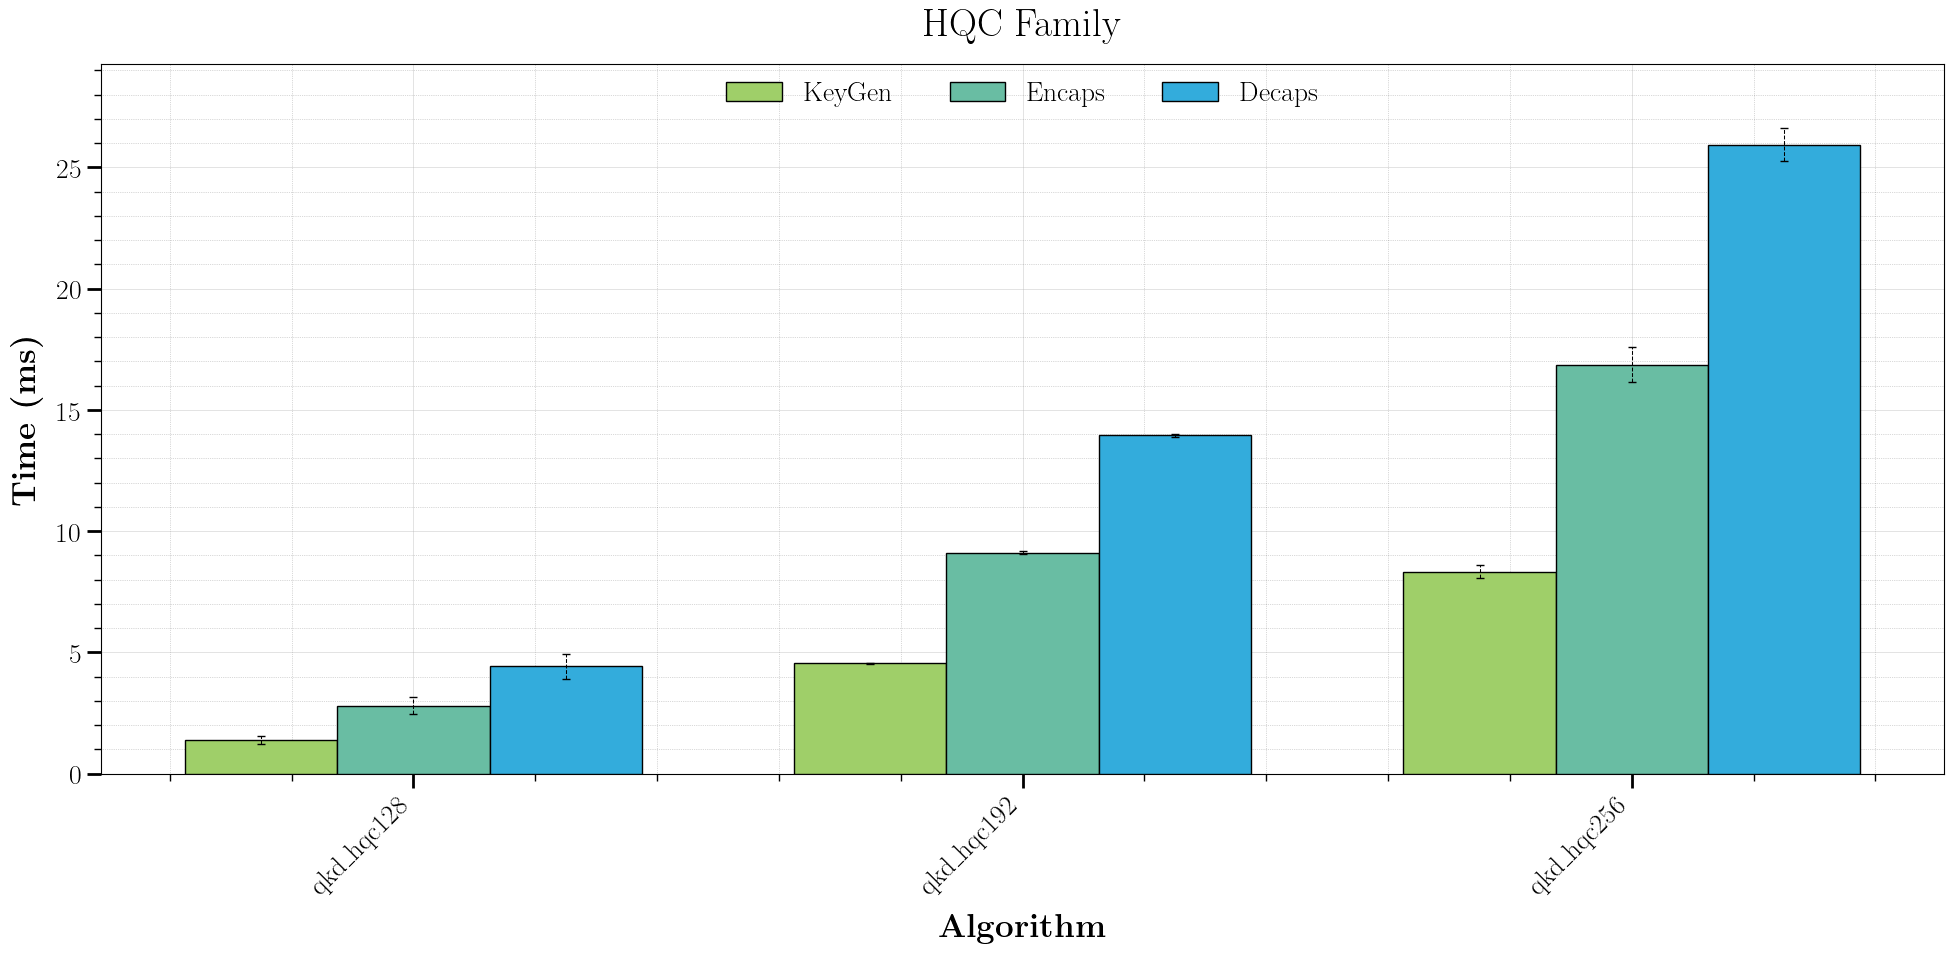

In [21]:
plot_kem_family(input_df=df_qkdkems_stats, family='hqc', error_suffix="_std", plot_title="qkdhqc_times.pdf", log_scale=False)

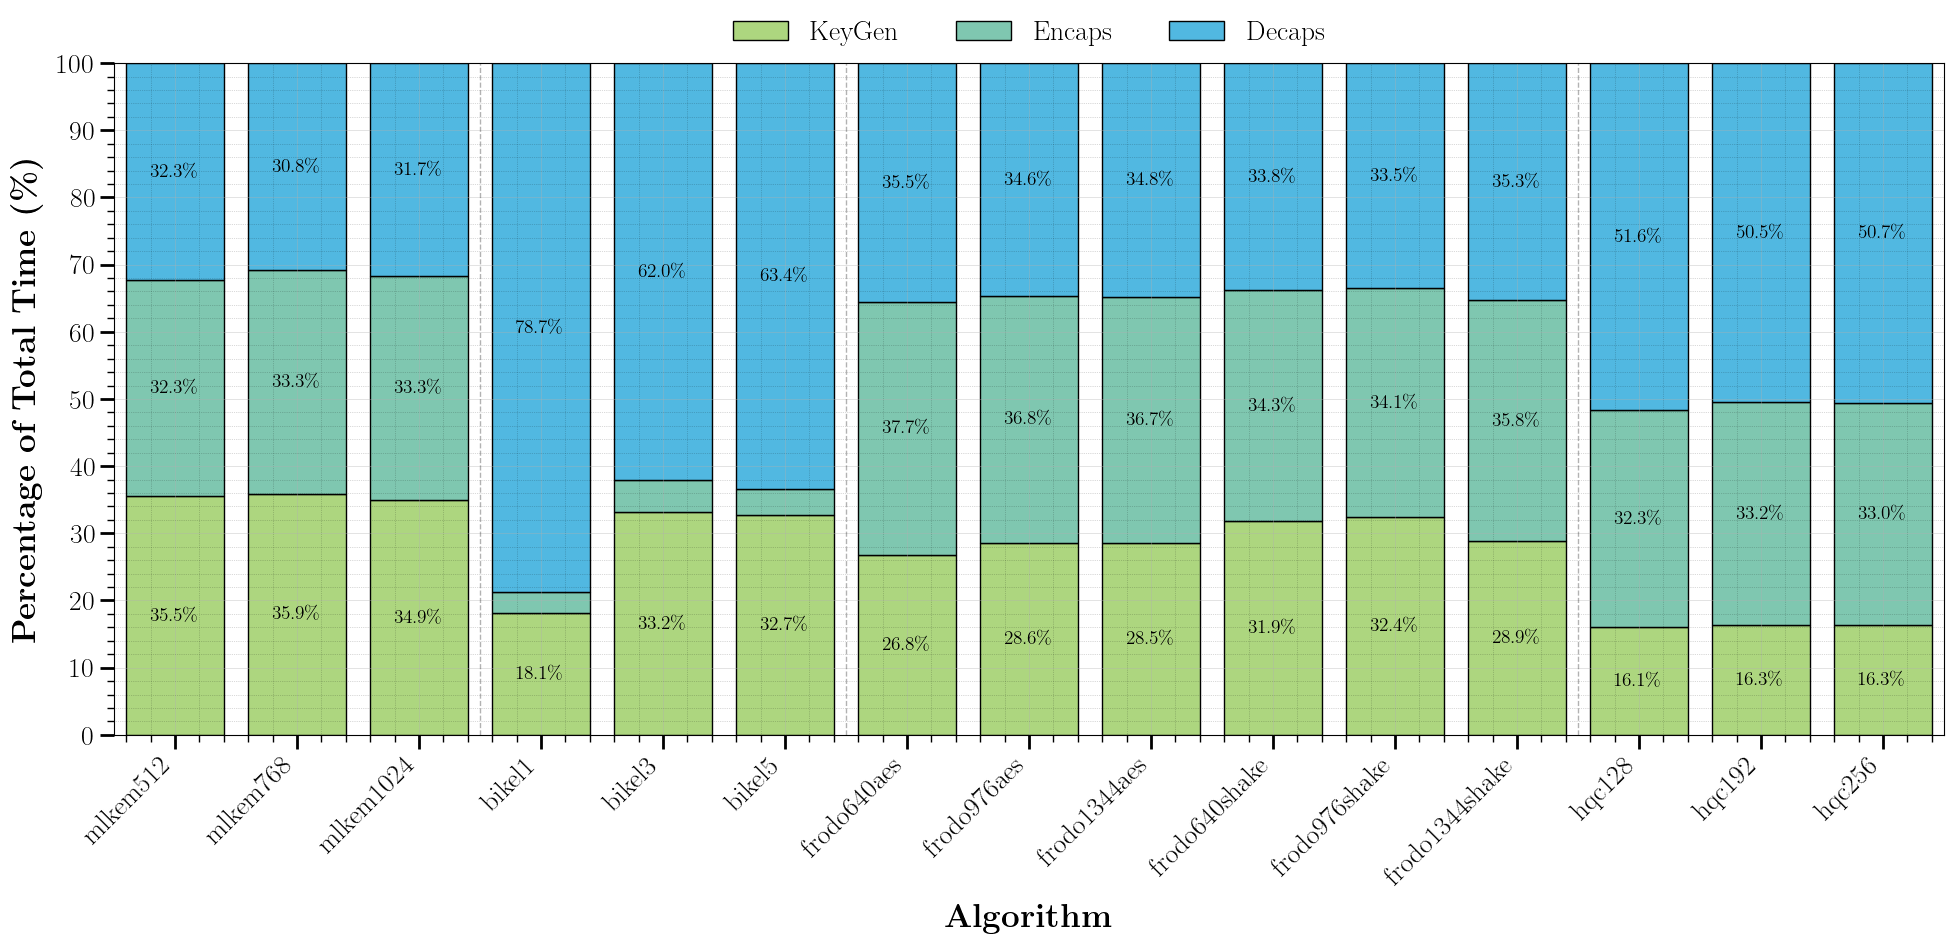

In [22]:
plot_ops_percent(input_df=df_kems_stats, family=None, plot_title="kems_ops_weights.pdf")

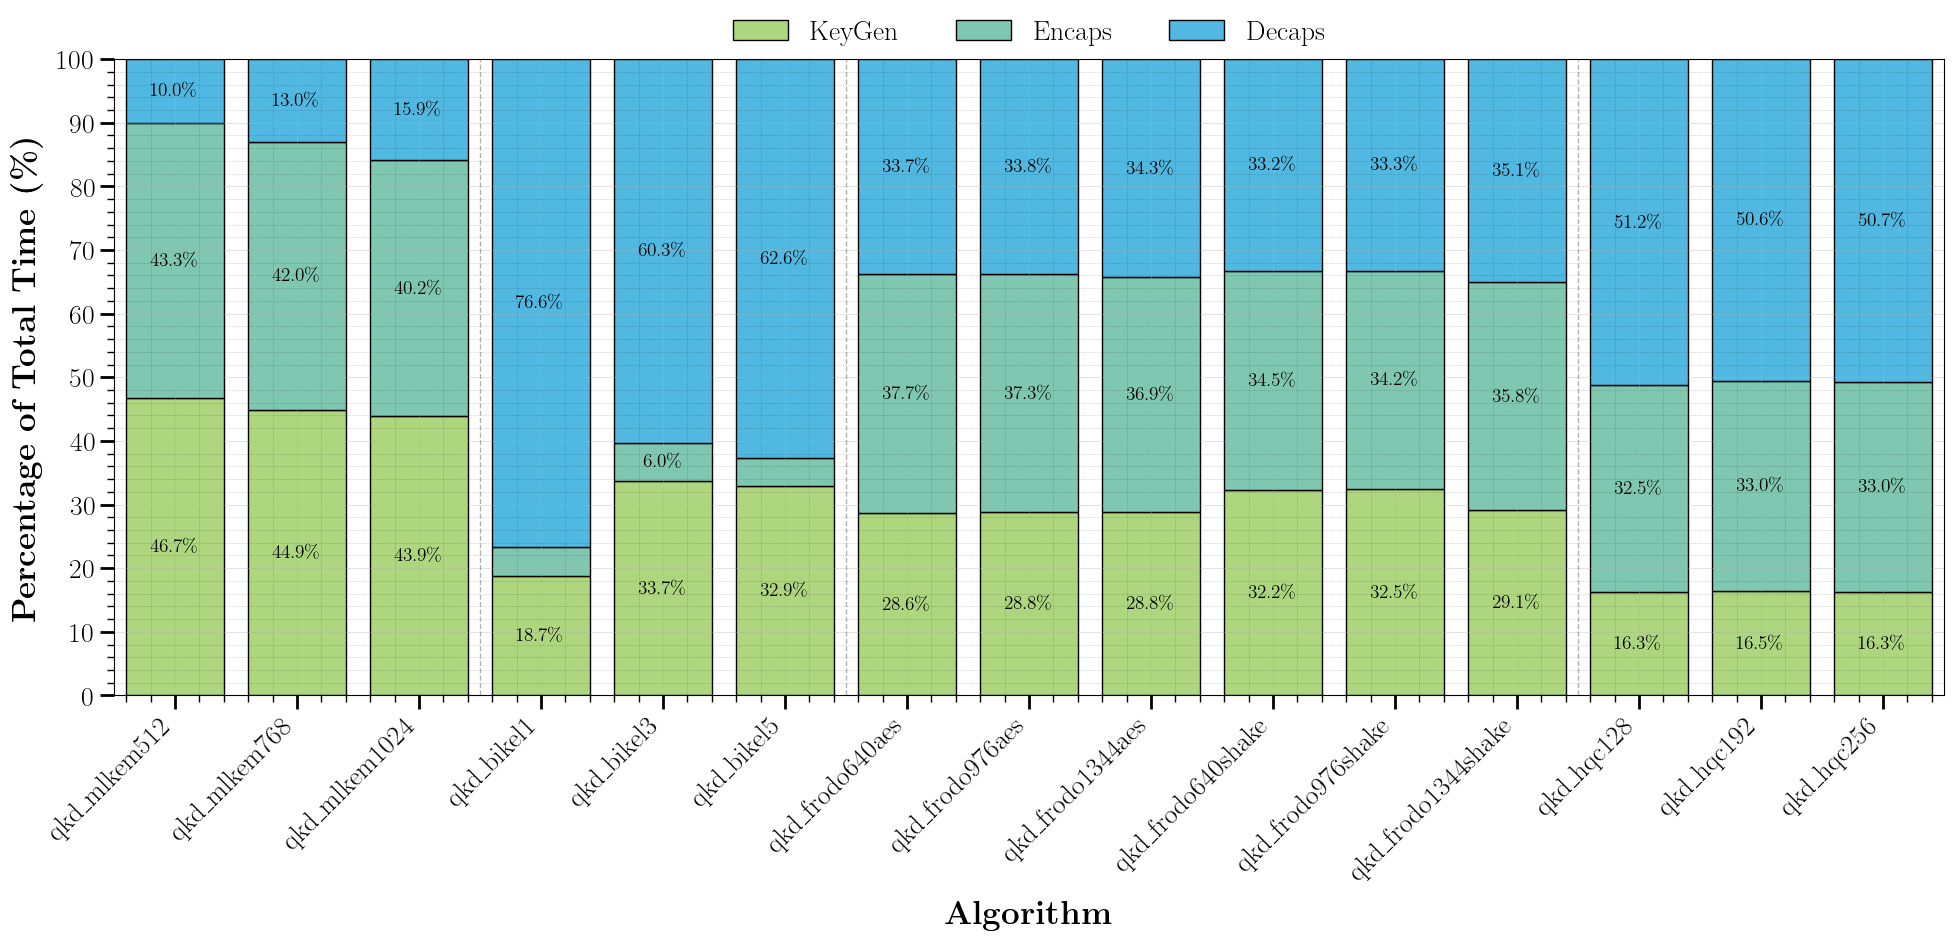

In [23]:
plot_ops_percent(input_df=df_qkdkems_stats, family=None, plot_title="qkdkems_ops_weights.pdf")

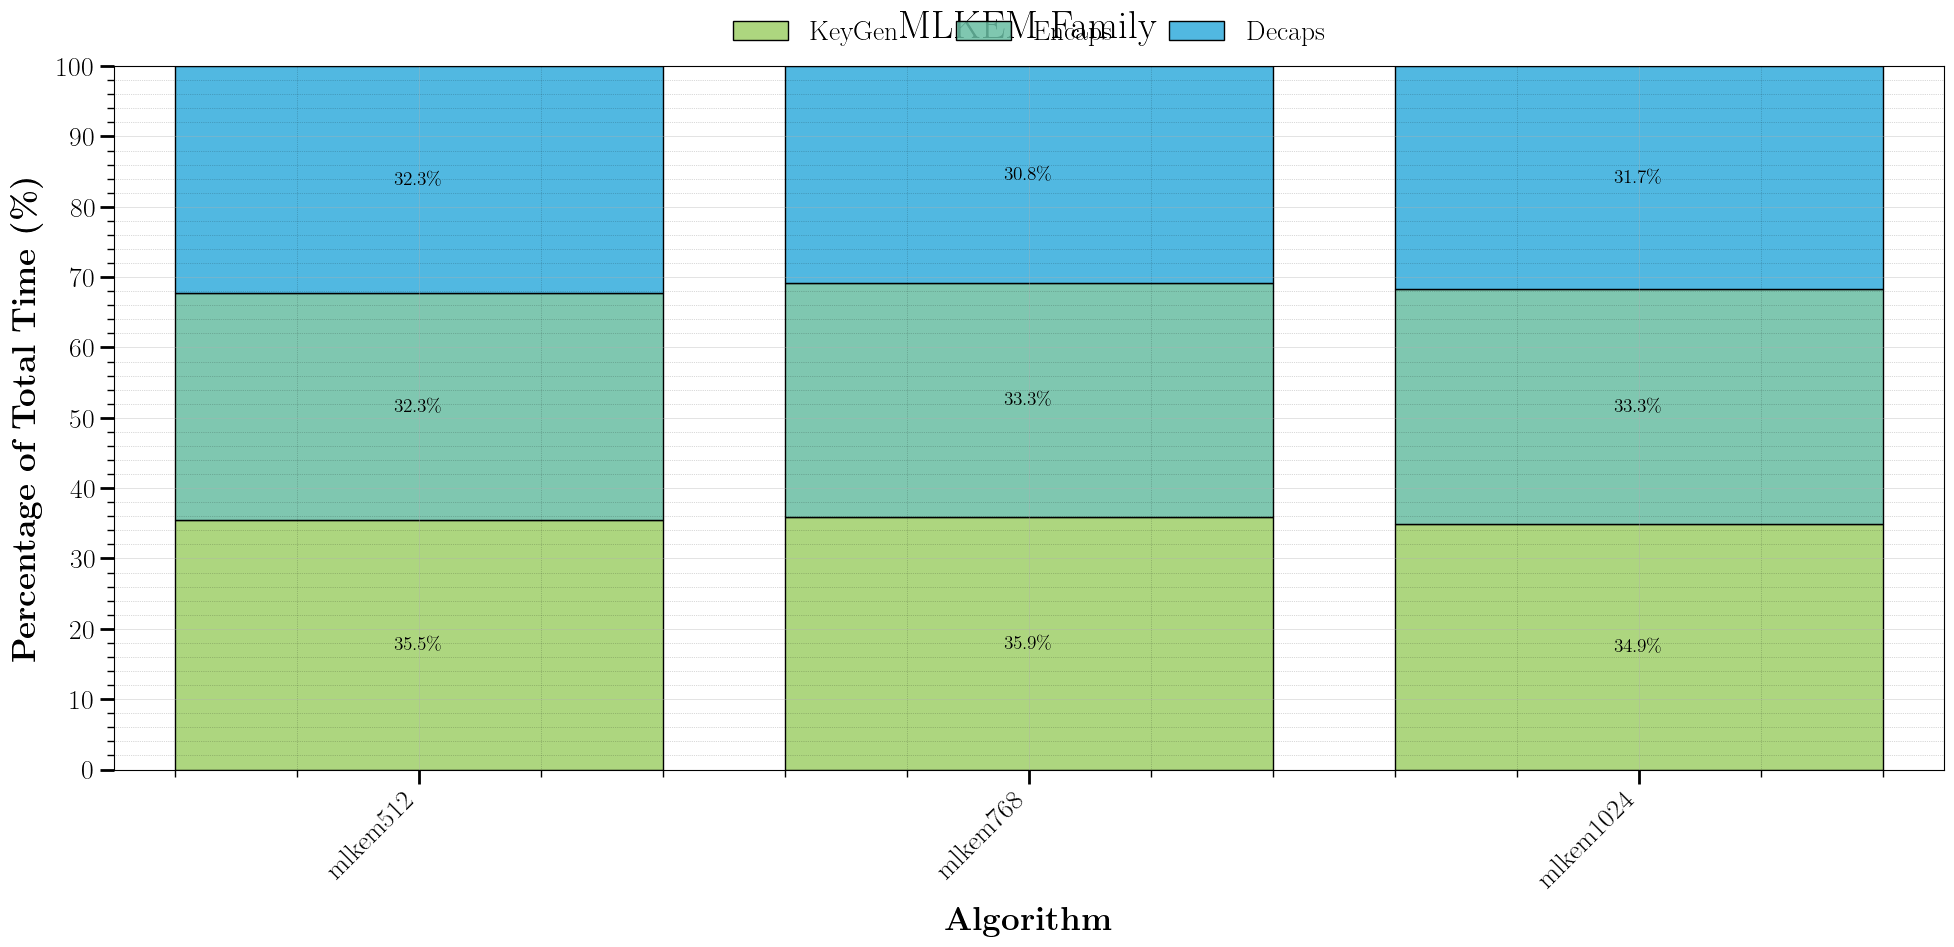

In [24]:
plot_ops_percent(input_df=df_kems_stats, family='mlkem', plot_title="mlkem_ops_weights.pdf")

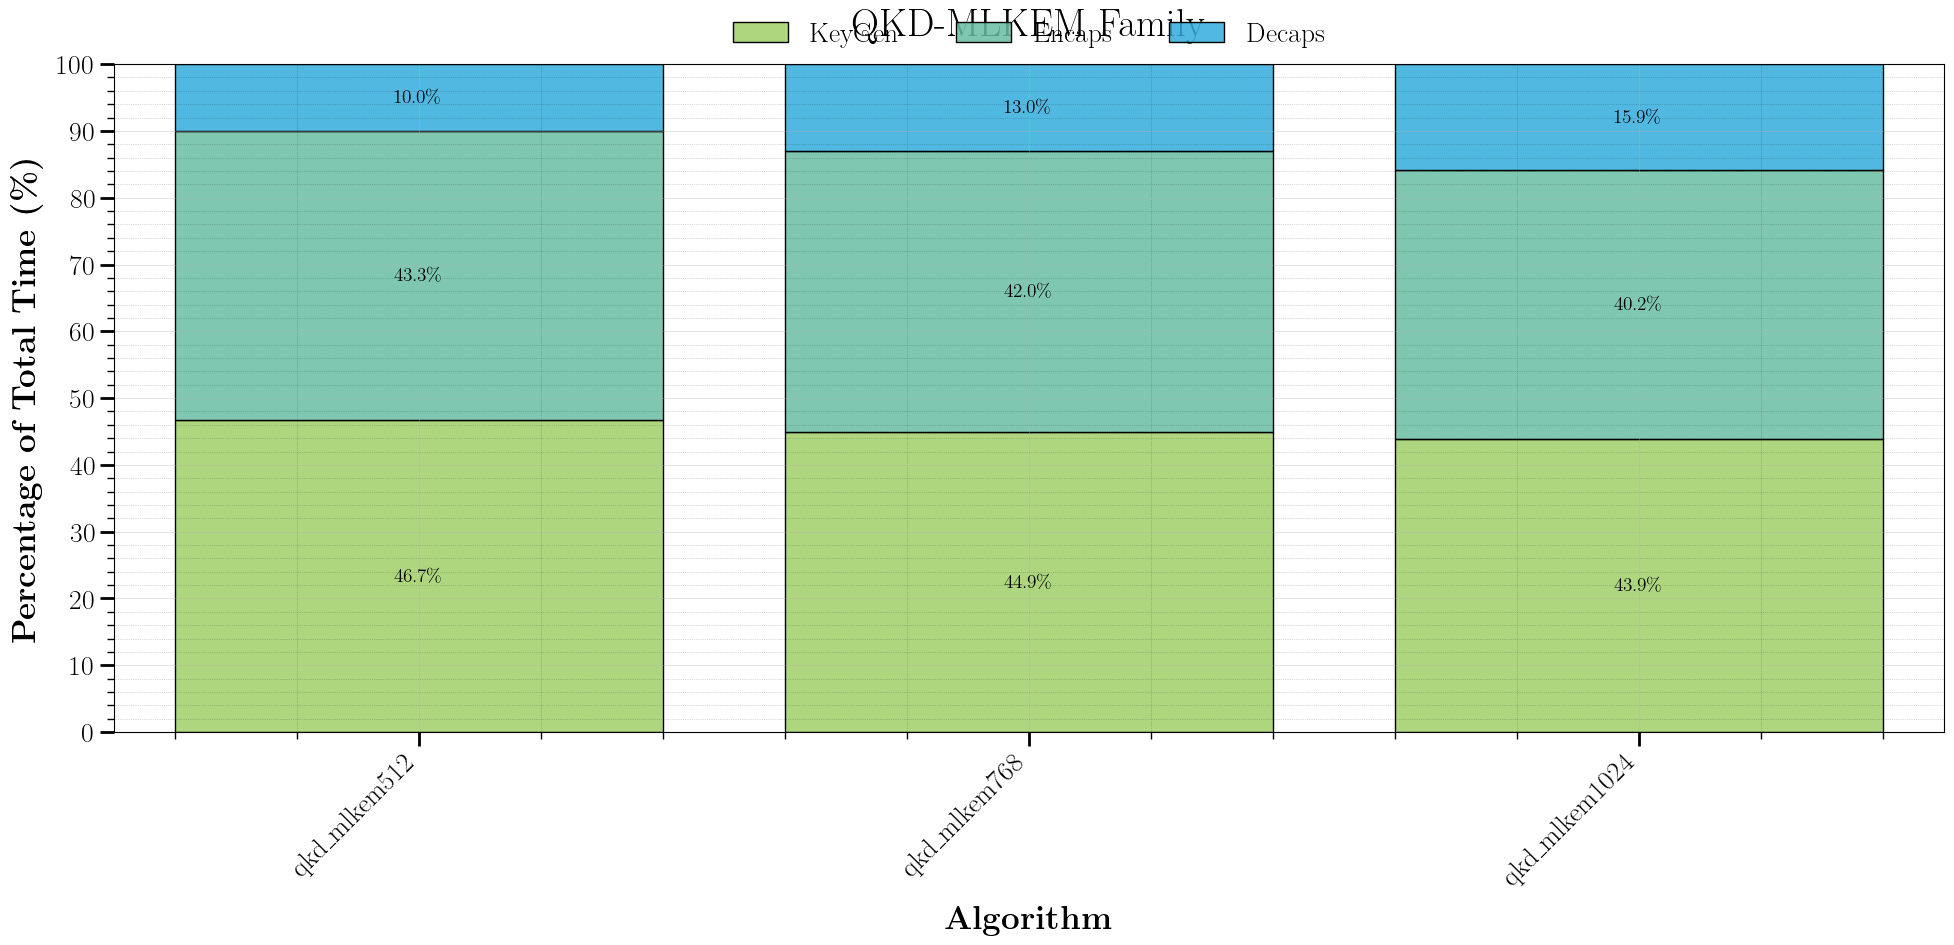

In [25]:
plot_ops_percent(input_df=df_qkdkems_stats, family='mlkem', plot_title="qkdmlkem_ops_weights.pdf")

In [26]:
# Combine the DataFrames for comparison 

from config import (KEM_FAMILIES)

algo_names = [alg for family in KEM_FAMILIES.values() for alg in family]

# Create copies to avoid modifying originals
df_std = df_kems_stats.copy()
df_qkd = df_qkdkems_stats.copy()

# Filtering 
df_std_ = df_std[df_std.index.isin(algo_names)]
df_qkd_ = df_qkd[df_qkd.index.str.replace('qkd_', '').isin(algo_names)]
    
# Rename indices to match if needed
df_qkd_.index = [idx.replace('qkd_', '') for idx in df_qkd_.index]
    
# Concatenate and sort
comparison_stats = pd.concat([df_std_, df_qkd_], 
                            keys=['Standard', 'QKD'],
                            names=['Variant', 'Algorithm'])

comparison_stats

NumIterations  KeyGen(ms)_mean  KeyGen(ms)_std  \
Variant  Algorithm                                                        
Standard bikel1                     98            0.209           0.017   
         bikel3                     98            0.580           0.016   
         bikel5                     98            1.394           0.017   
         frodo1344aes               98            0.676           0.005   
         frodo1344shake             98            3.276           0.492   
         frodo640aes                98            0.468           0.016   
         frodo640shake              98            1.006           0.071   
         frodo976aes                98            0.532           0.008   
         frodo976shake              98            2.127           0.018   
         hqc128                     98            1.488           0.030   
         hqc192                     98            4.018           1.050   
         hqc256                     98            6.973           1.107   
         mlkem1024                  98            0.022           0.008   
         mlkem512                   98            0.011           0.004   
         mlkem768                   98            0.014           0.000   
QKD      bikel1                     98            0.191           0.017   
         bikel3                     98            0.464           0.010   
         bikel5                     98            1.087           0.024   
         frodo1344aes               98            0.927           0.028   
         frodo1344shake             98            3.582           0.681   
         frodo640aes                98            0.531           0.030   
         frodo640shake              98            1.735           0.097   
         frodo976aes                98            0.579           0.060   
         frodo976shake              98            2.157           0.010   
         hqc128                     98            1.404           0.167   
         hqc192                     98            4.545           0.018   
         hqc256                     98            8.335           0.267   
         mlkem1024                  98            0.036           0.003   
         mlkem512                   98            0.028           0.003   
         mlkem768                   98            0.031           0.001   

                         KeyGen(ms)_min  KeyGen(ms)_max  Encaps(ms)_mean  \
Variant  Algorithm                                                         
Standard bikel1                   0.201           0.333            0.037   
         bikel3                   0.563           0.646            0.084   
         bikel5                   1.372           1.462            0.166   
         frodo1344aes             0.671           0.712            0.870   
         frodo1344shake           2.877           4.398            4.054   
         frodo640aes              0.457           0.596            0.657   
         frodo640shake            0.970           1.262            1.084   
         frodo976aes              0.521           0.566            0.685   
         frodo976shake            2.112           2.254            2.242   
         hqc128                   1.472           1.771            2.993   
         hqc192                   3.405           7.959            8.169   
         hqc256                   6.239          10.340           14.078   
         mlkem1024                0.019           0.049            0.021   
         mlkem512                 0.009           0.022            0.010   
         mlkem768                 0.014           0.016            0.013   
QKD      bikel1                   0.175           0.267            0.048   
         bikel3                   0.452           0.513            0.082   
         bikel5                   1.058           1.182            0.147   
         frodo1344aes             0.908           1.088            1.188   
         frodo1344shake     

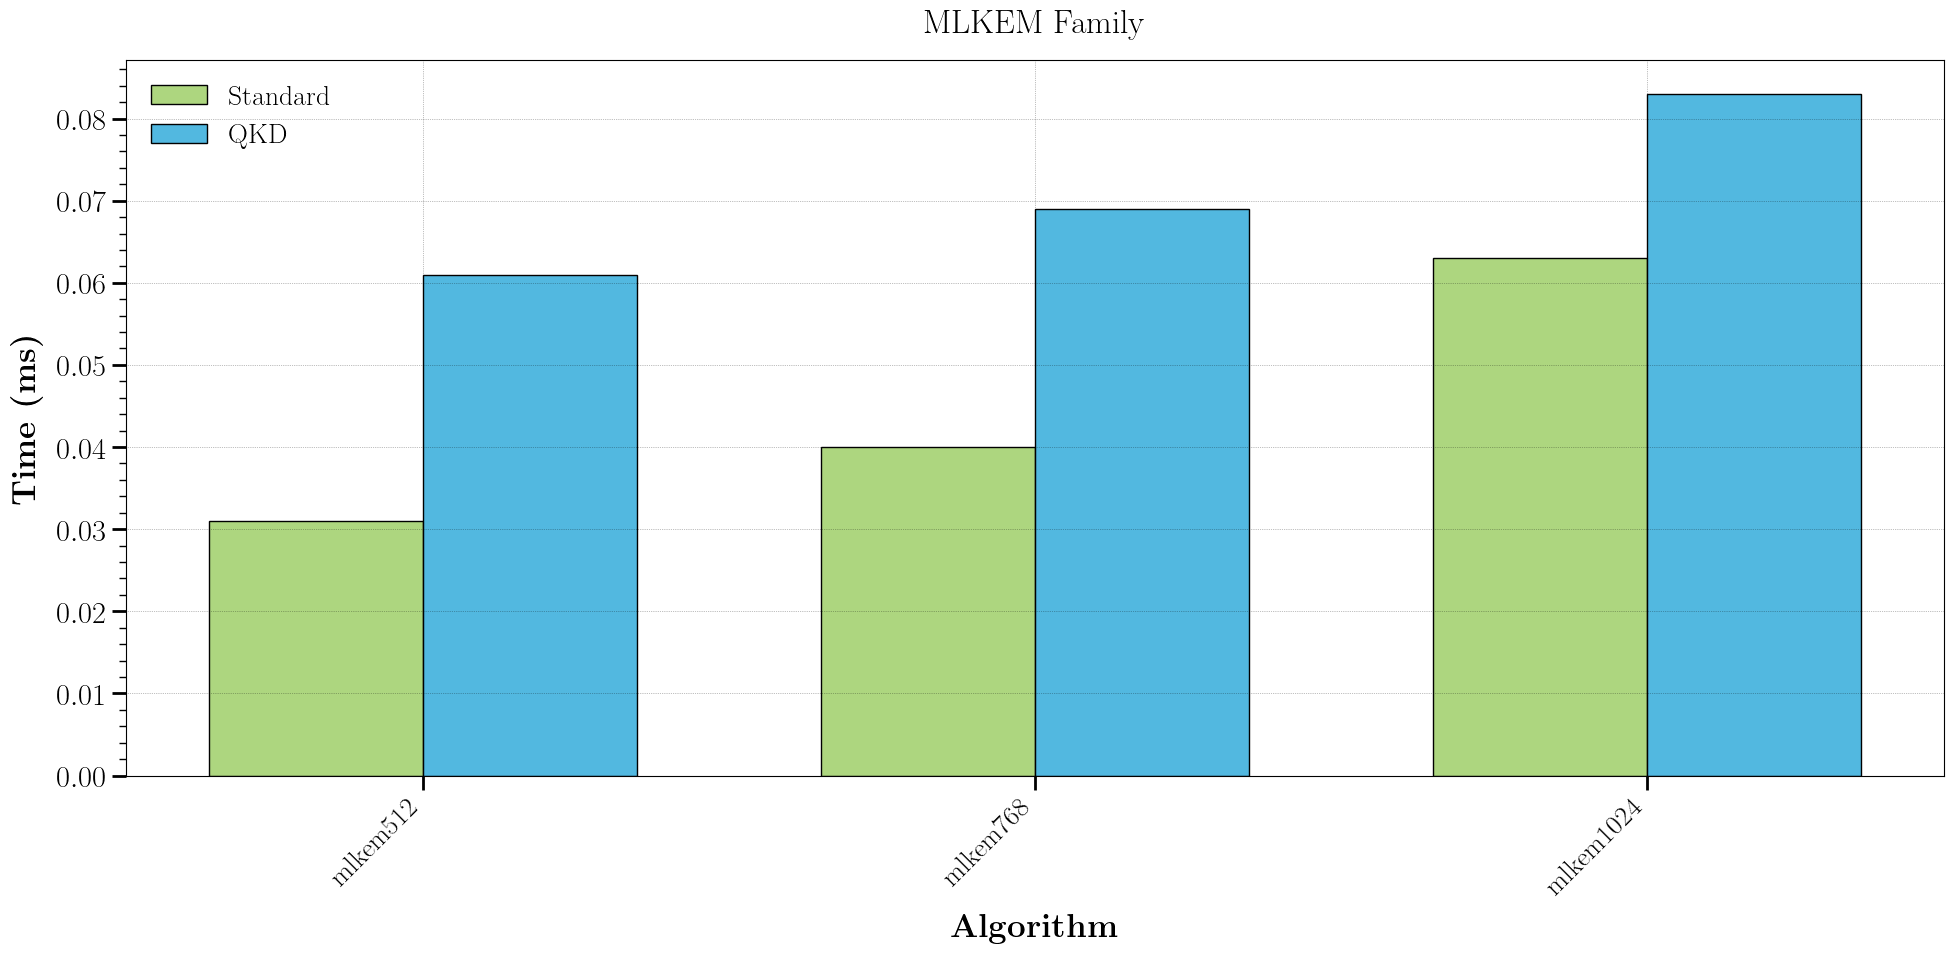

In [28]:
plot_kem_comparison(comparison_stats=comparison_stats, family="mlkem", operation='TotalTime(ms)', plot_title="mlkem_comparison.pdf")

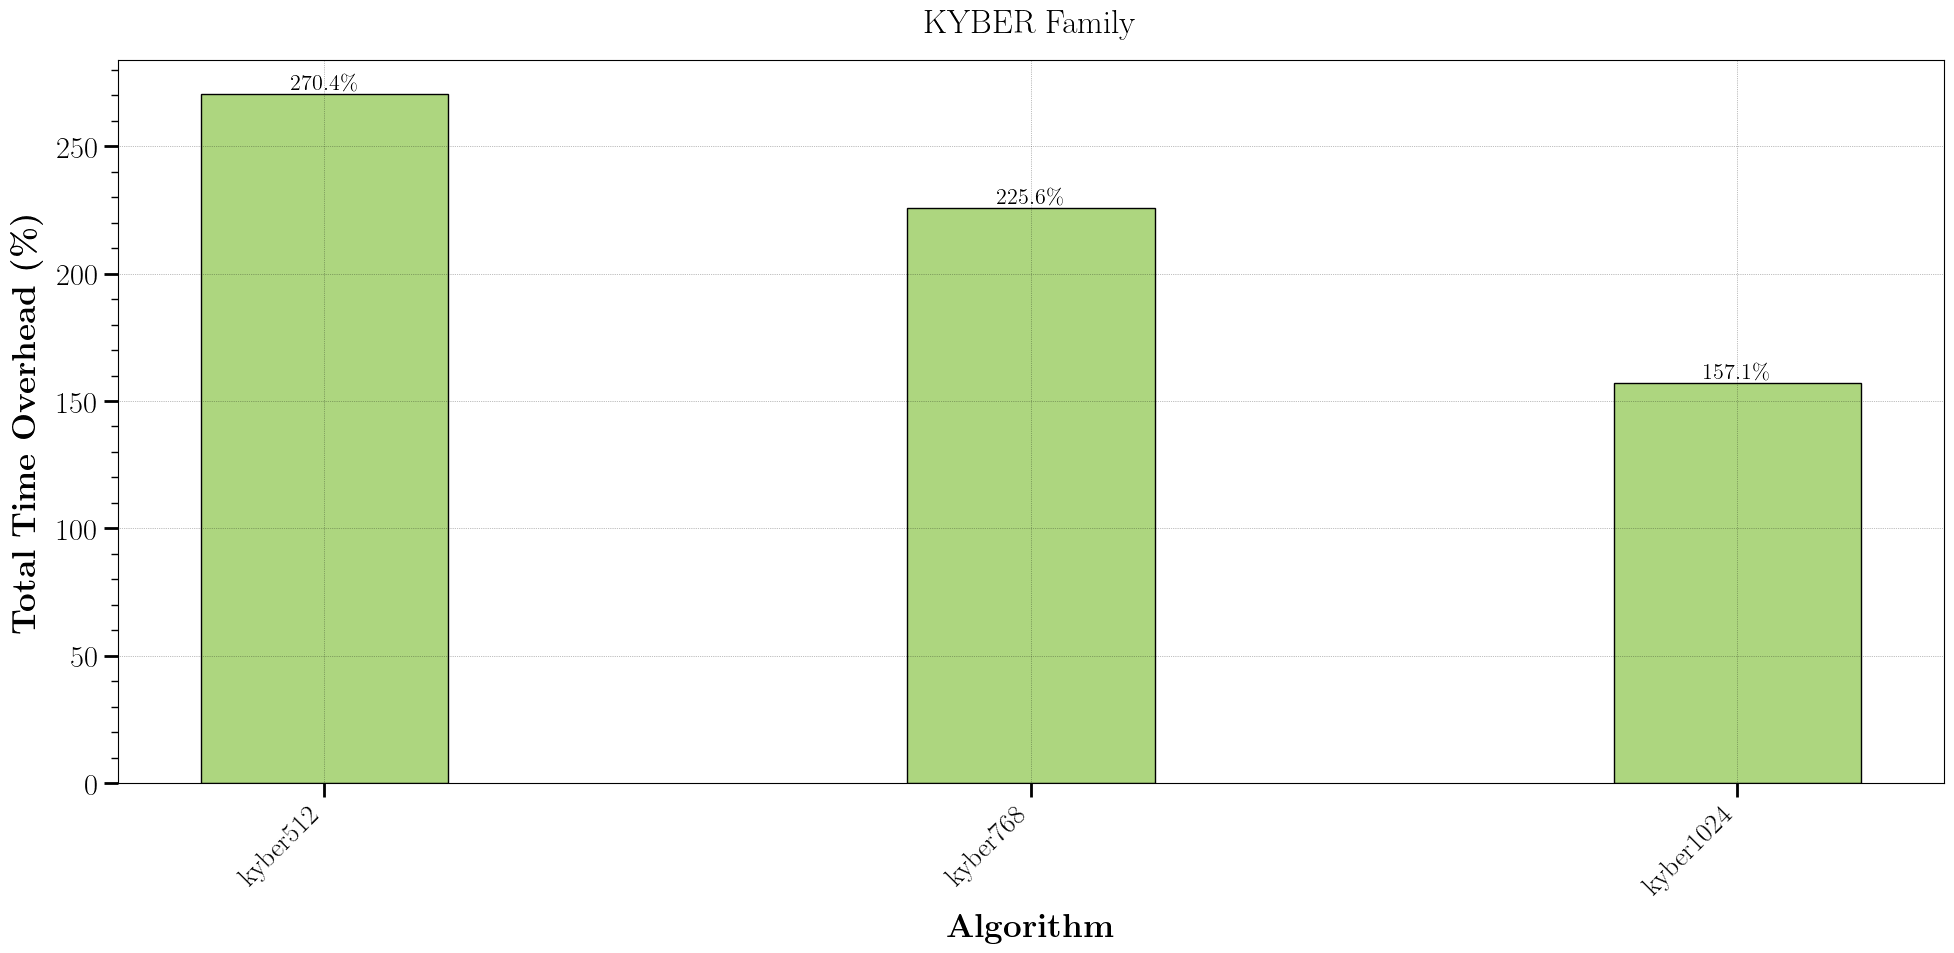

In [26]:
plot_kem_comparison(comparison_stats=comparison_stats, family="kyber", operation='TotalTime', overhead=True, plot_title="kyber_comparison_overhead.pdf")

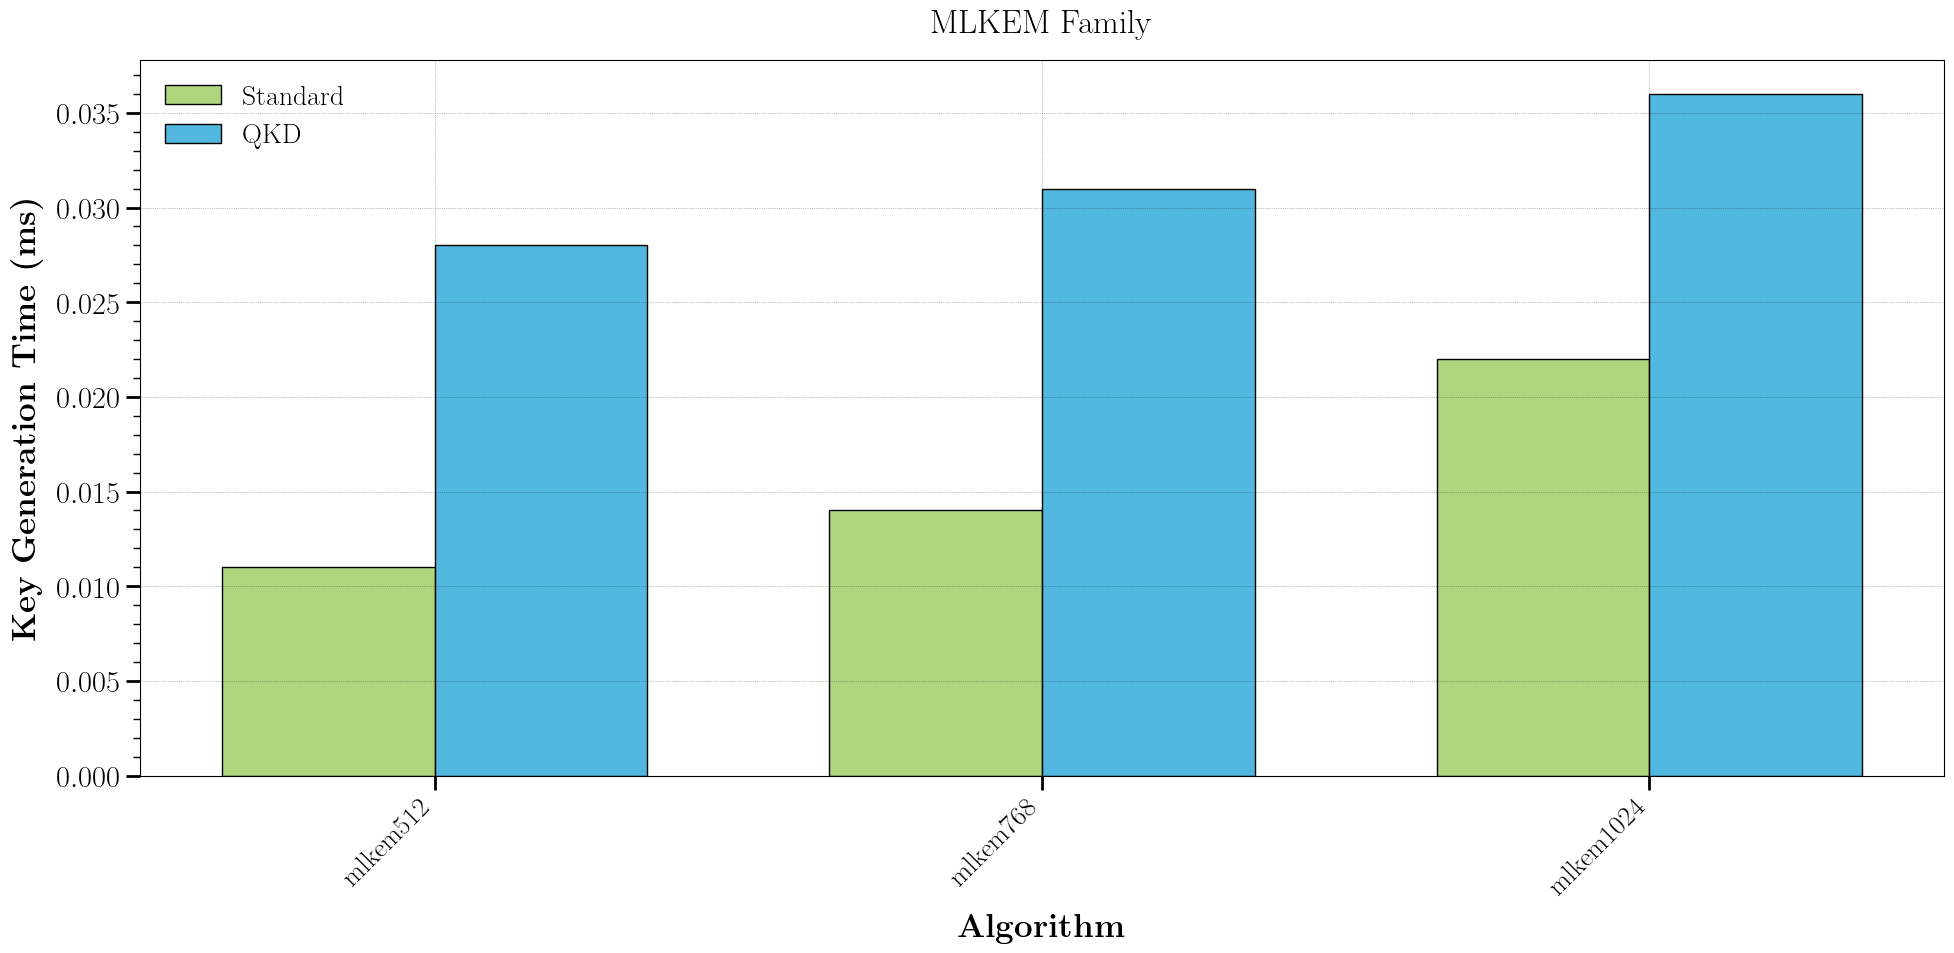

In [30]:
plot_kem_comparison(comparison_stats=comparison_stats, family="mlkem", operation='KeyGen(ms)', plot_title="mlkem_comparison_keygen.pdf")

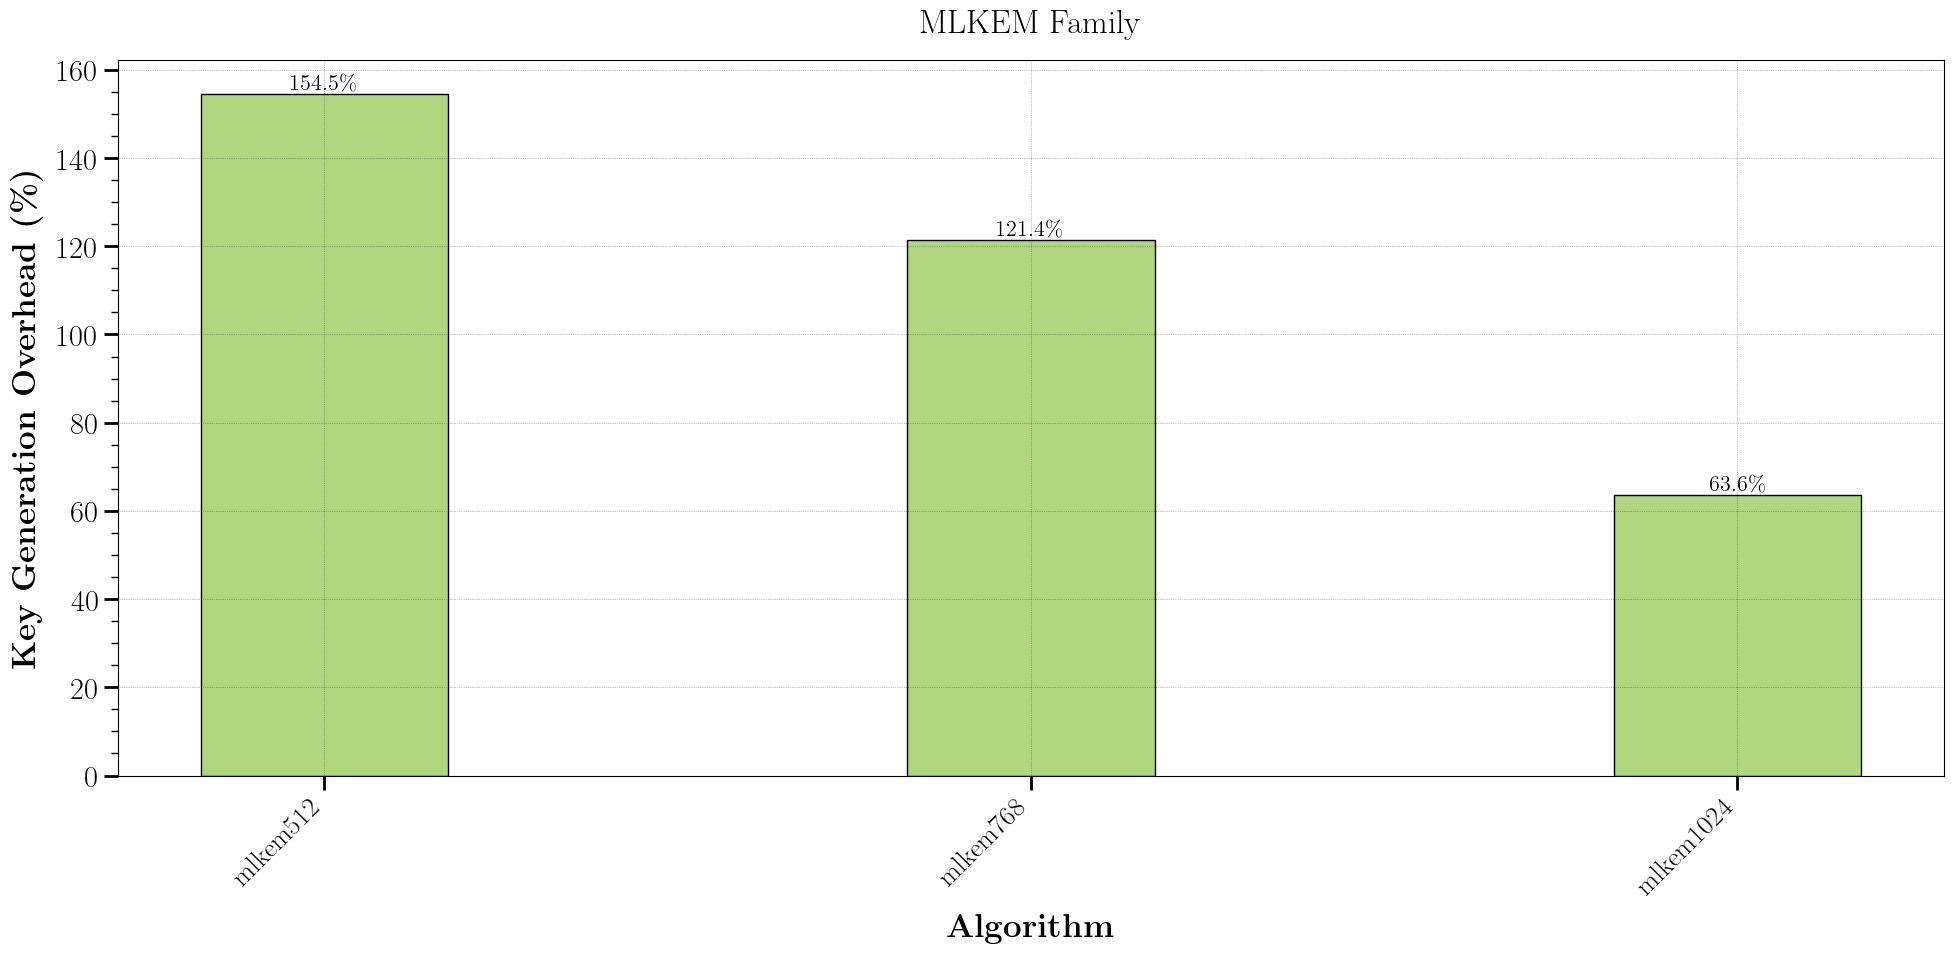

In [31]:
plot_kem_comparison(comparison_stats=comparison_stats, family="mlkem", operation='KeyGen(ms)', overhead=True, plot_title="mlkem_comparison_keygen_overhead.pdf")

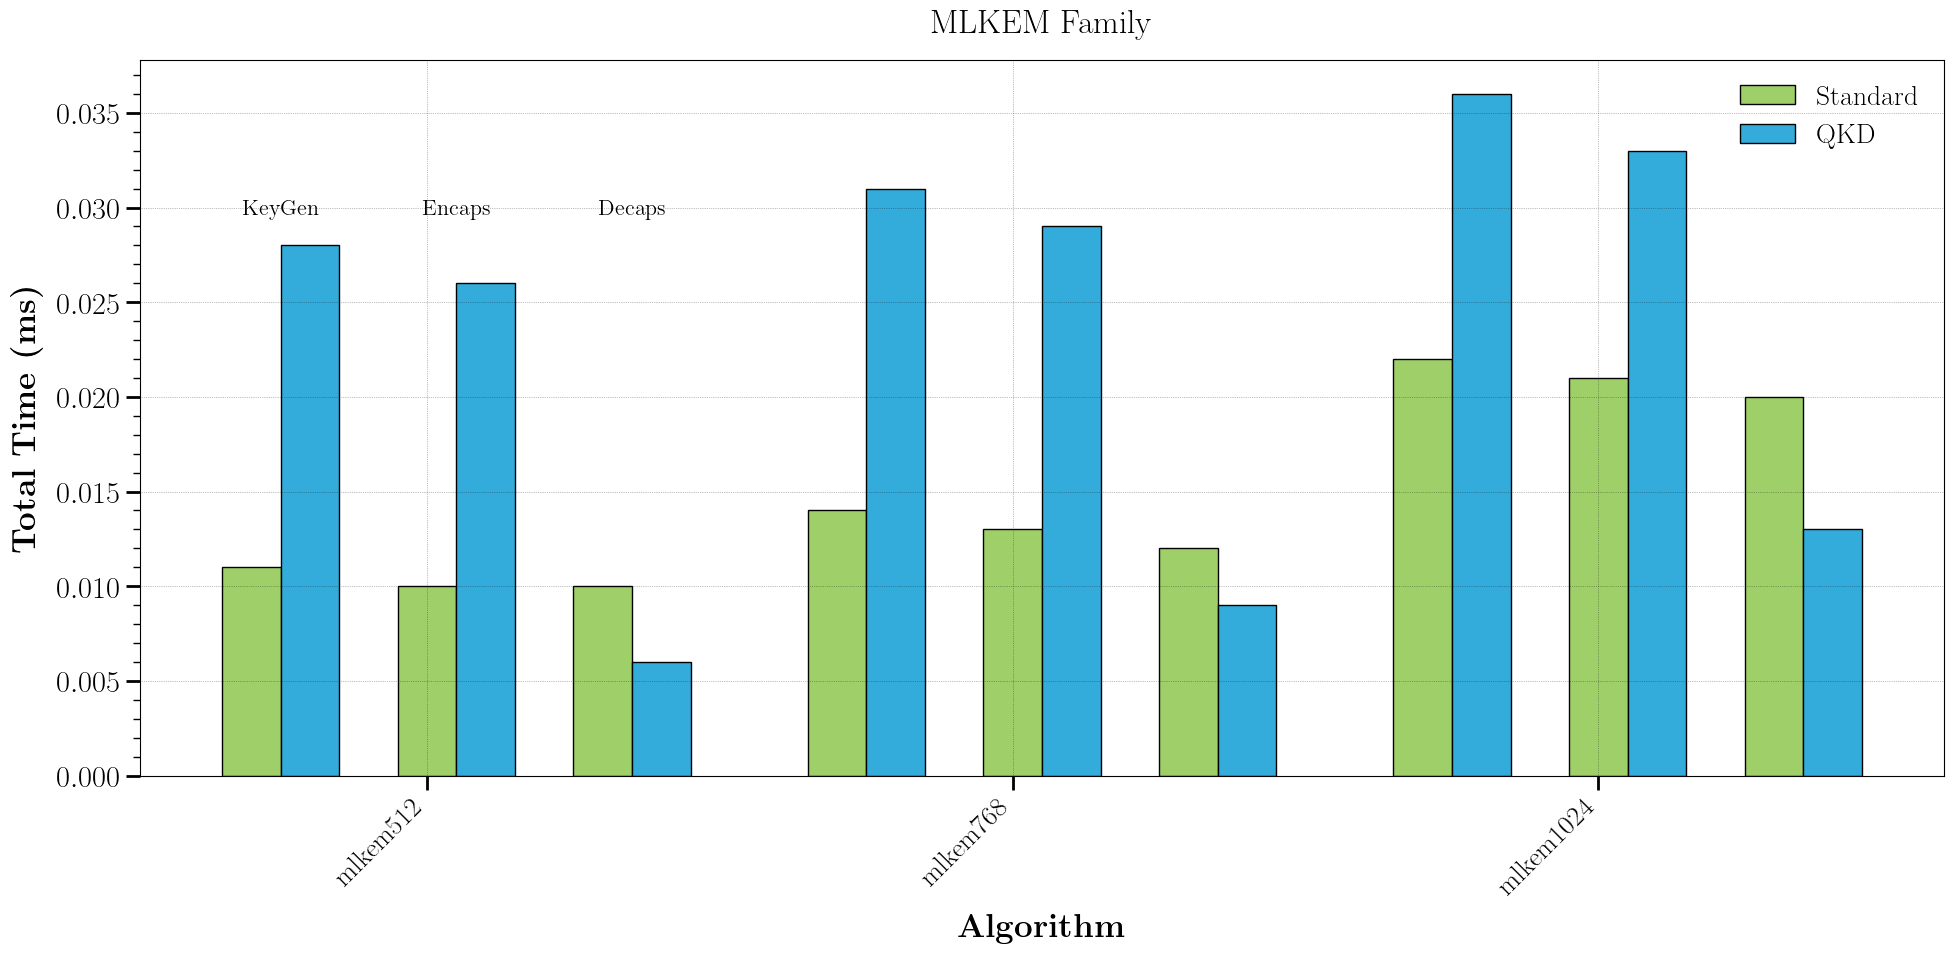

In [32]:
plot_kem_comparison(comparison_stats=comparison_stats, family="mlkem", operation='all', plot_title="mlkem_comparison_ops.pdf")

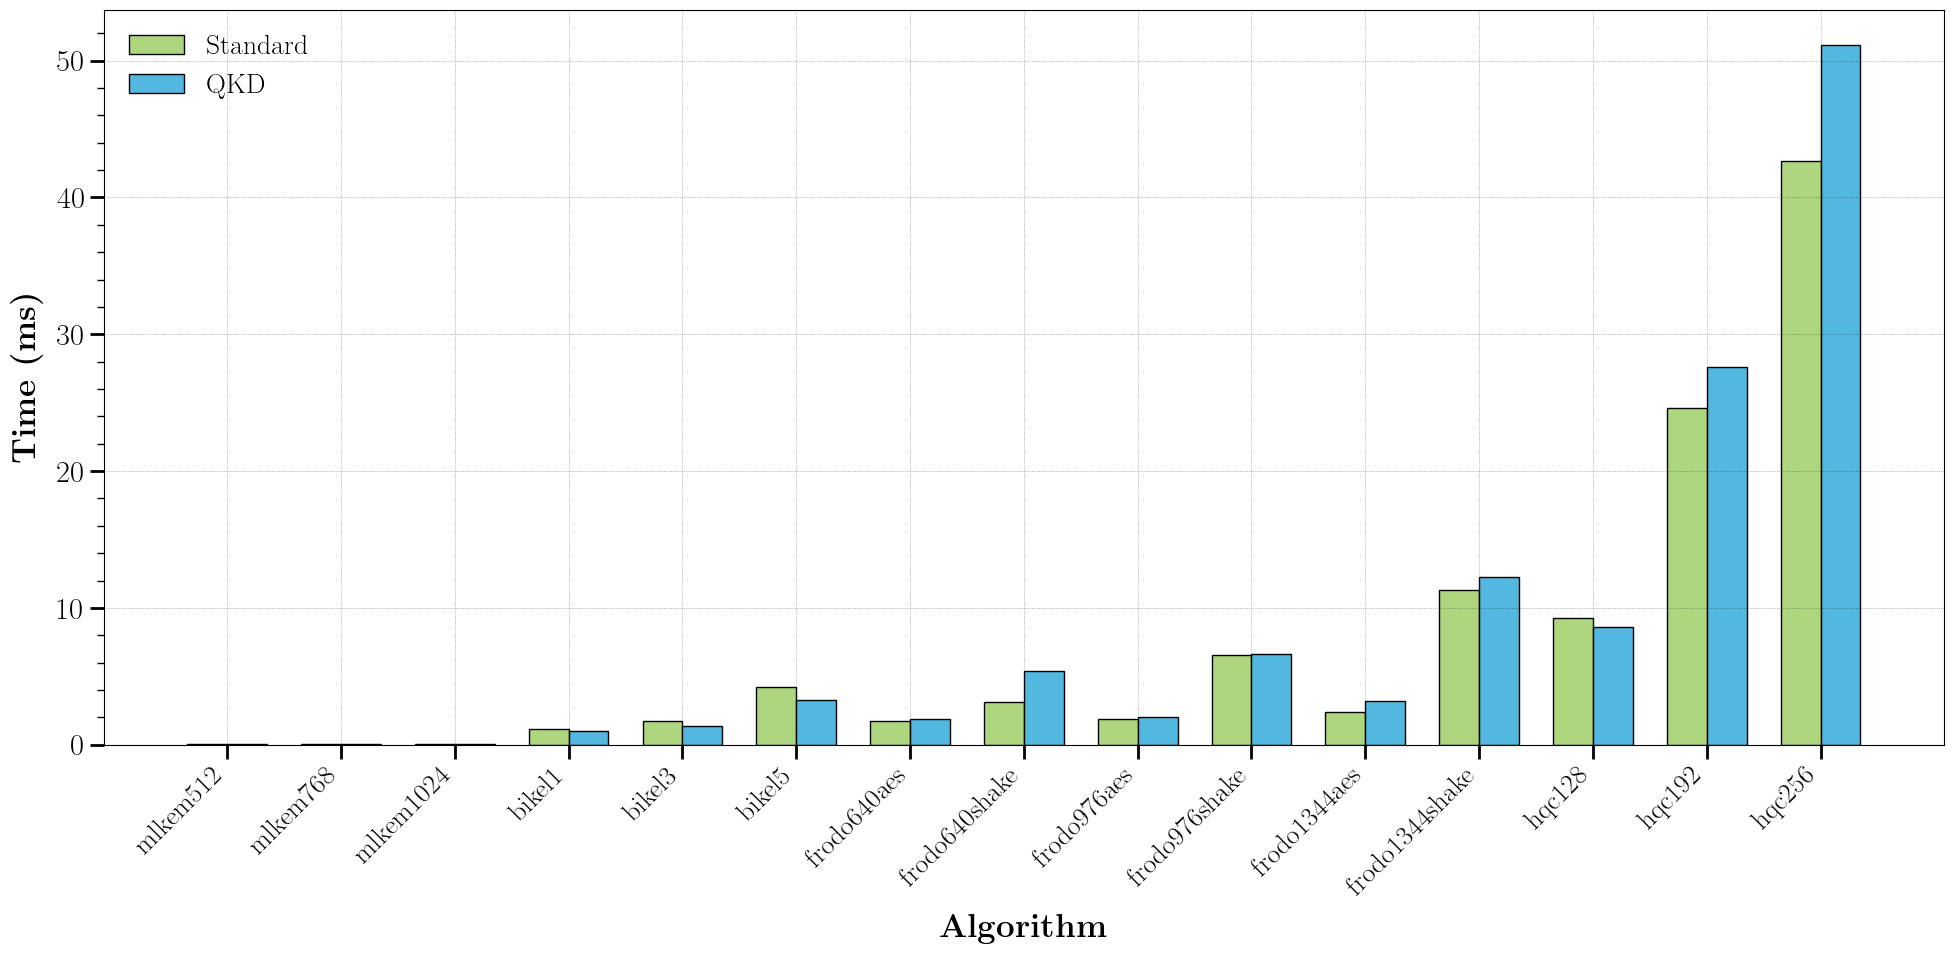

In [34]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=False, operation='TotalTime(ms)',plot_title="kems_comparison.pdf")

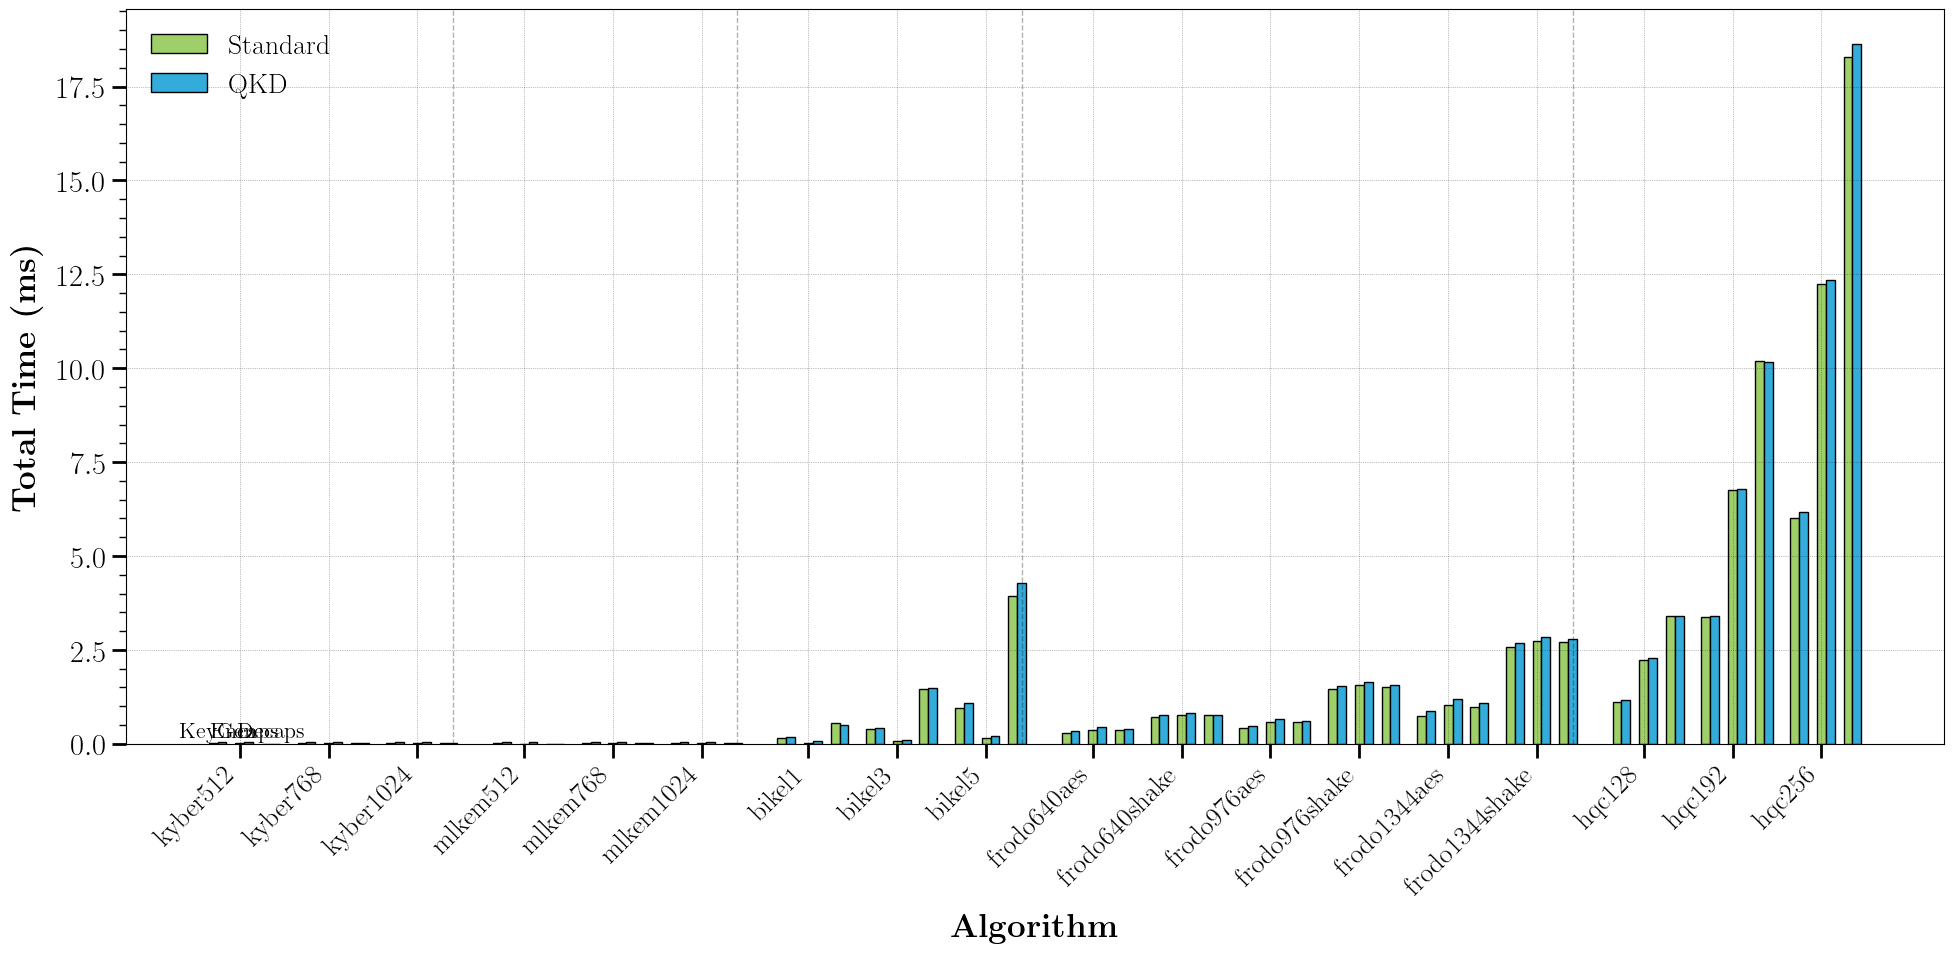

In [31]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, operation='all', overhead=False, plot_title="kems_comparison.pdf")

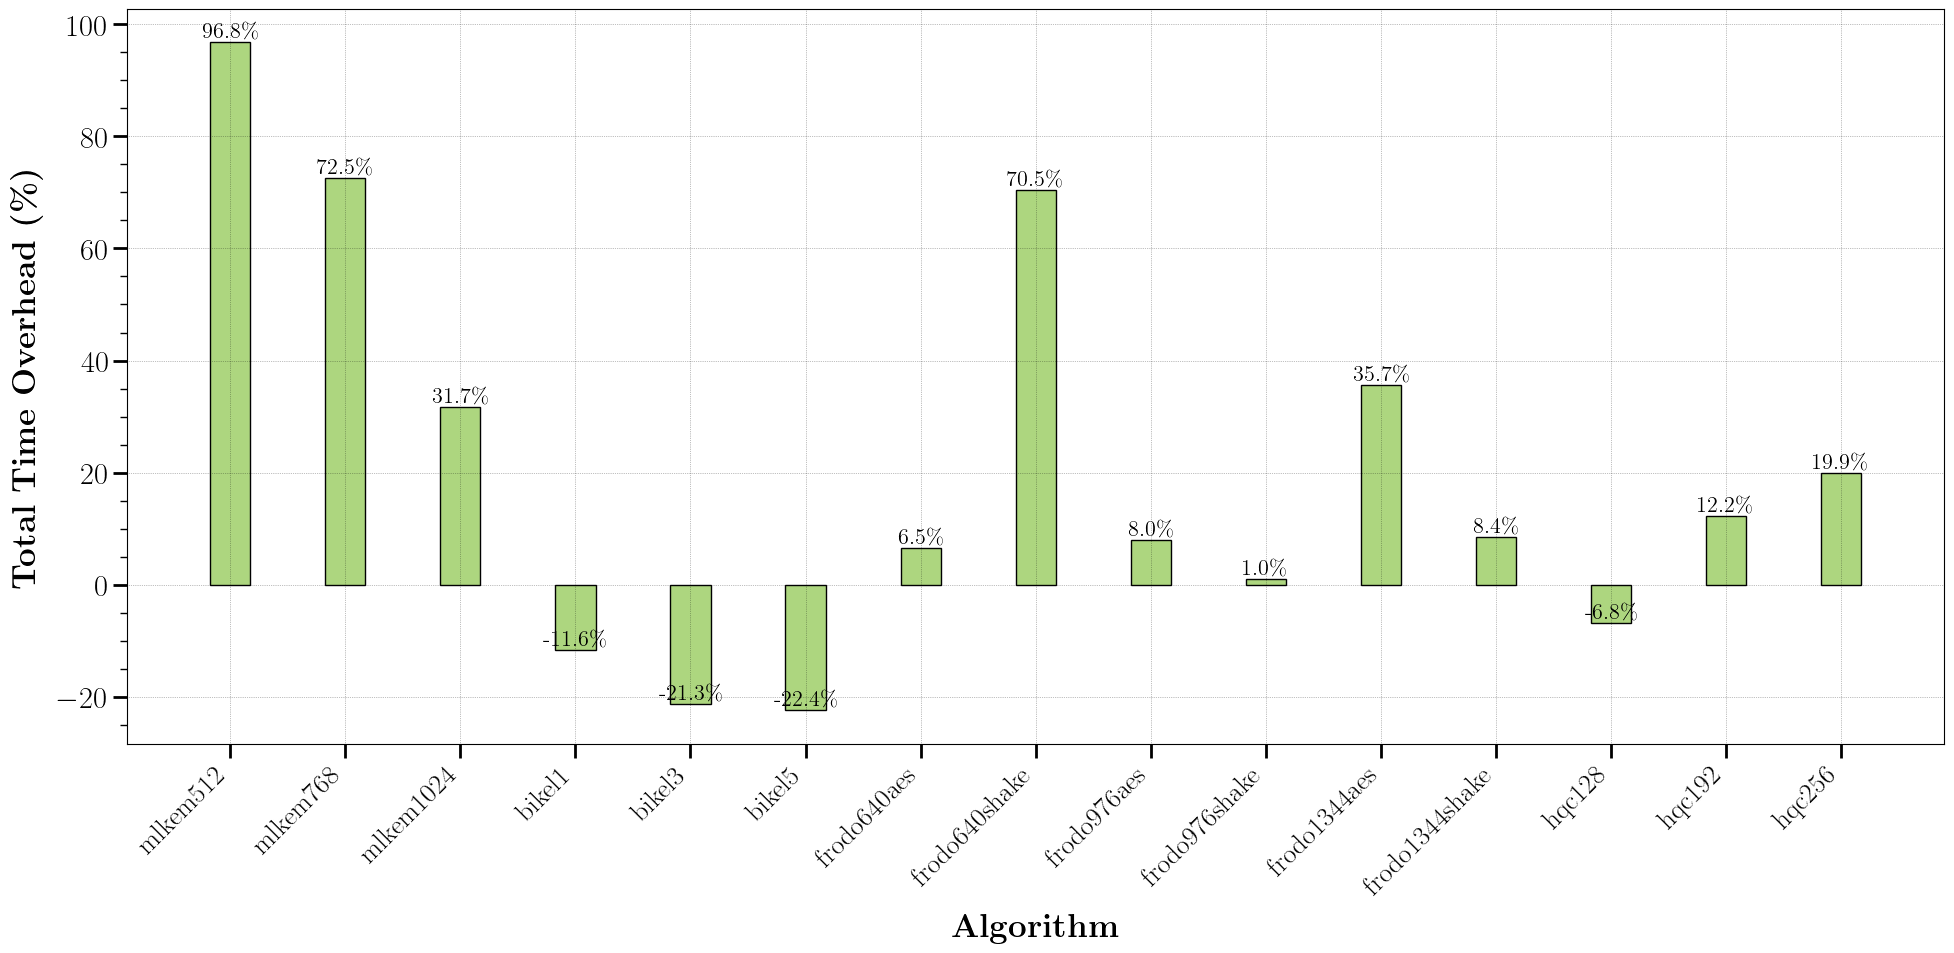

In [35]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=True, operation='TotalTime(ms)',plot_title="kems_comparison_overhead.pdf")

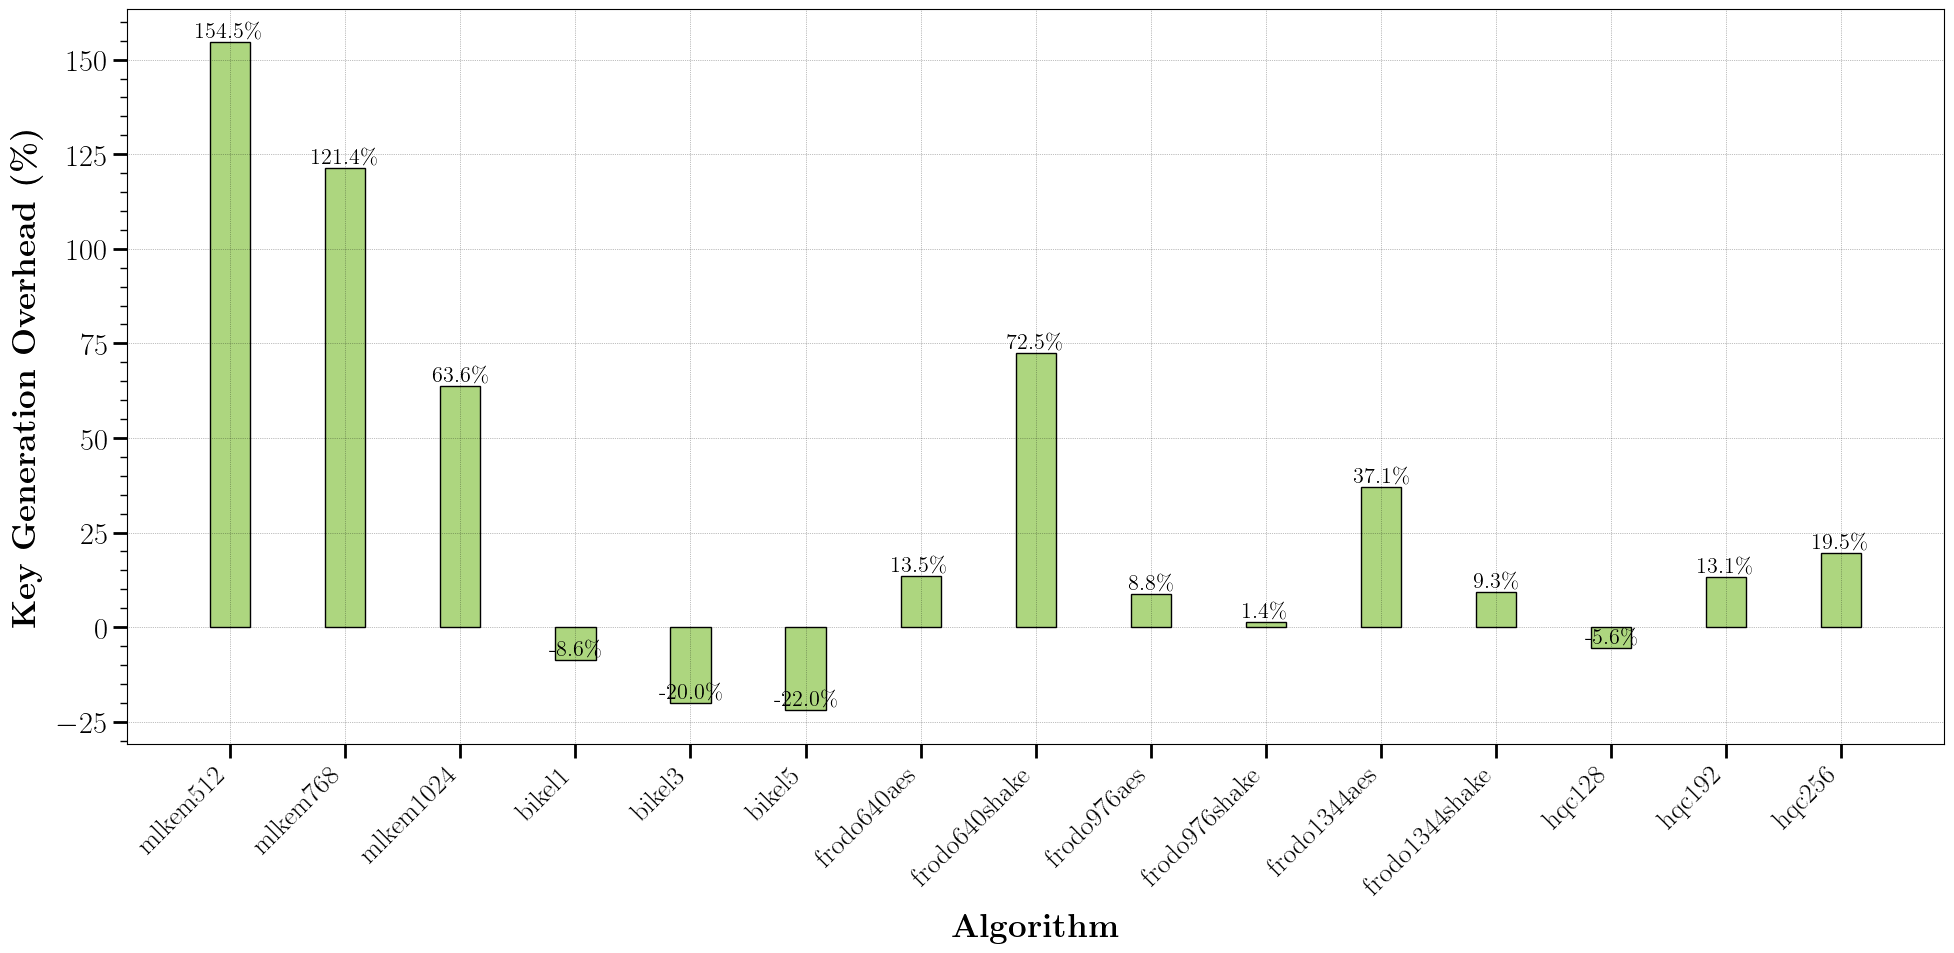

In [36]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=True, operation='KeyGen(ms)', plot_title="kems_comparison_kgoverhead.pdf")

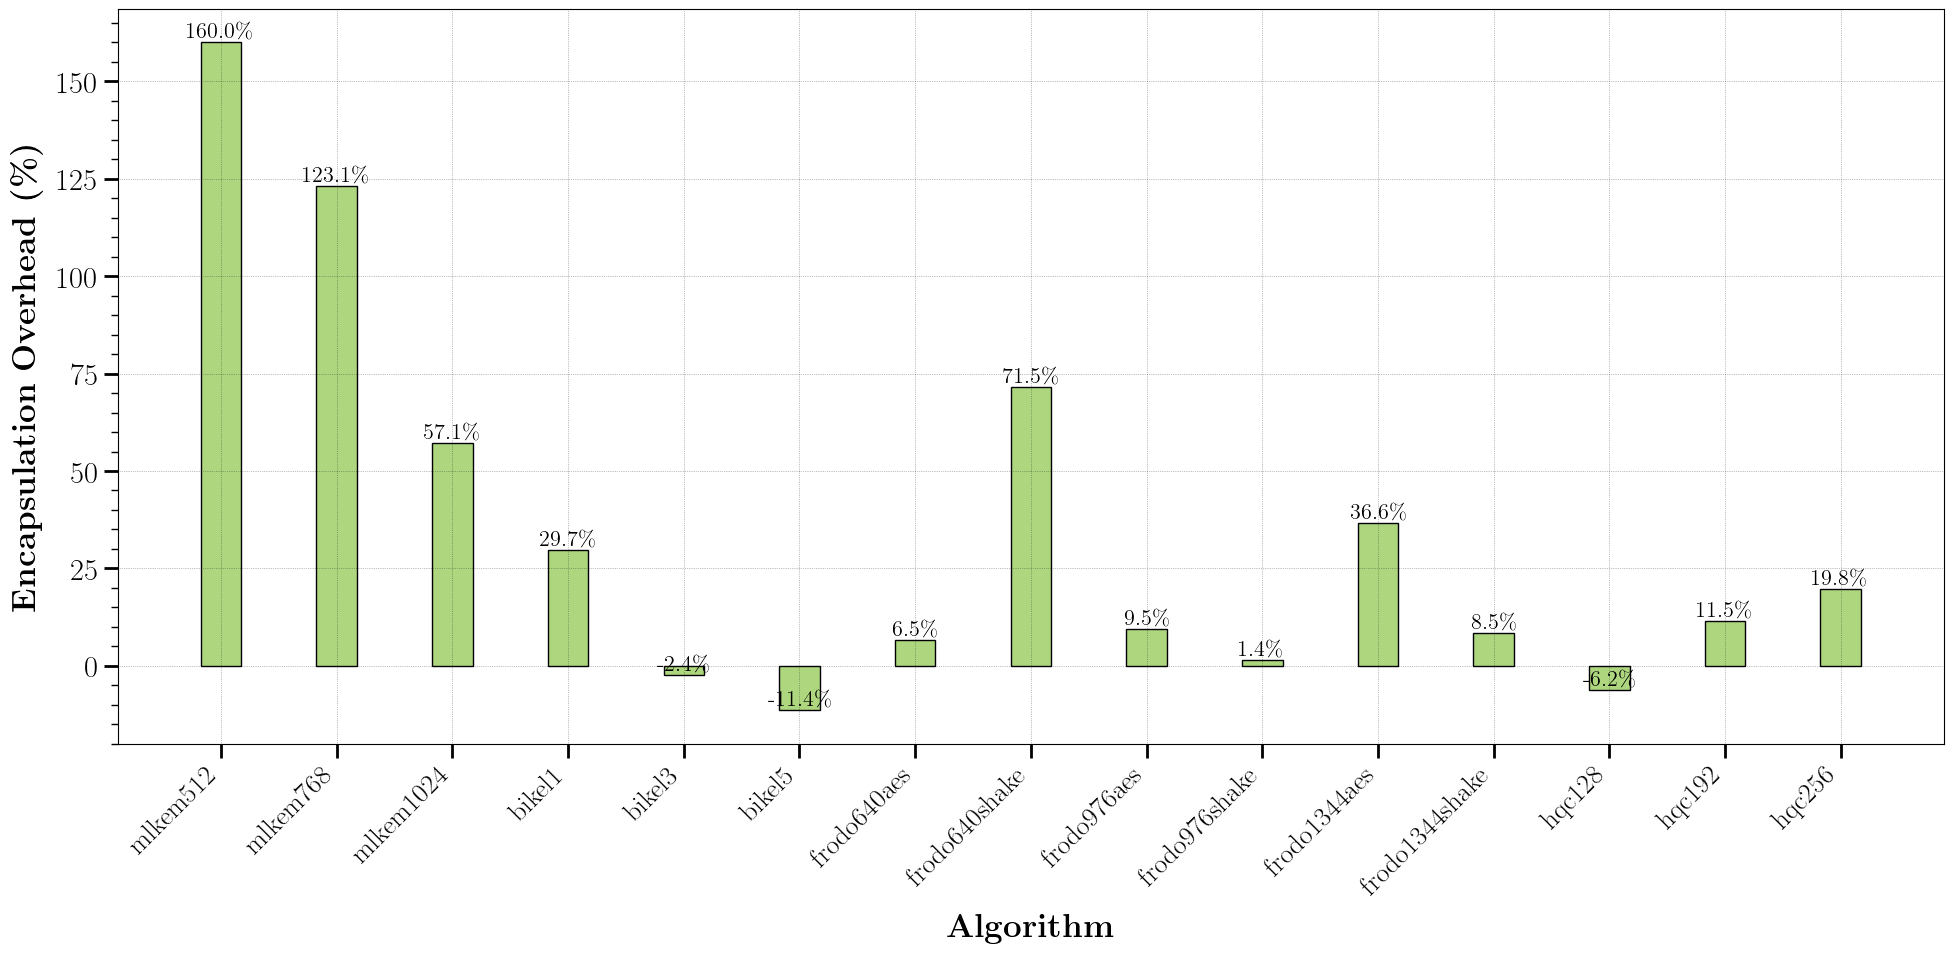

In [37]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=True, operation='Encaps(ms)', plot_title="kems_comparison_encapoverhead.pdf")

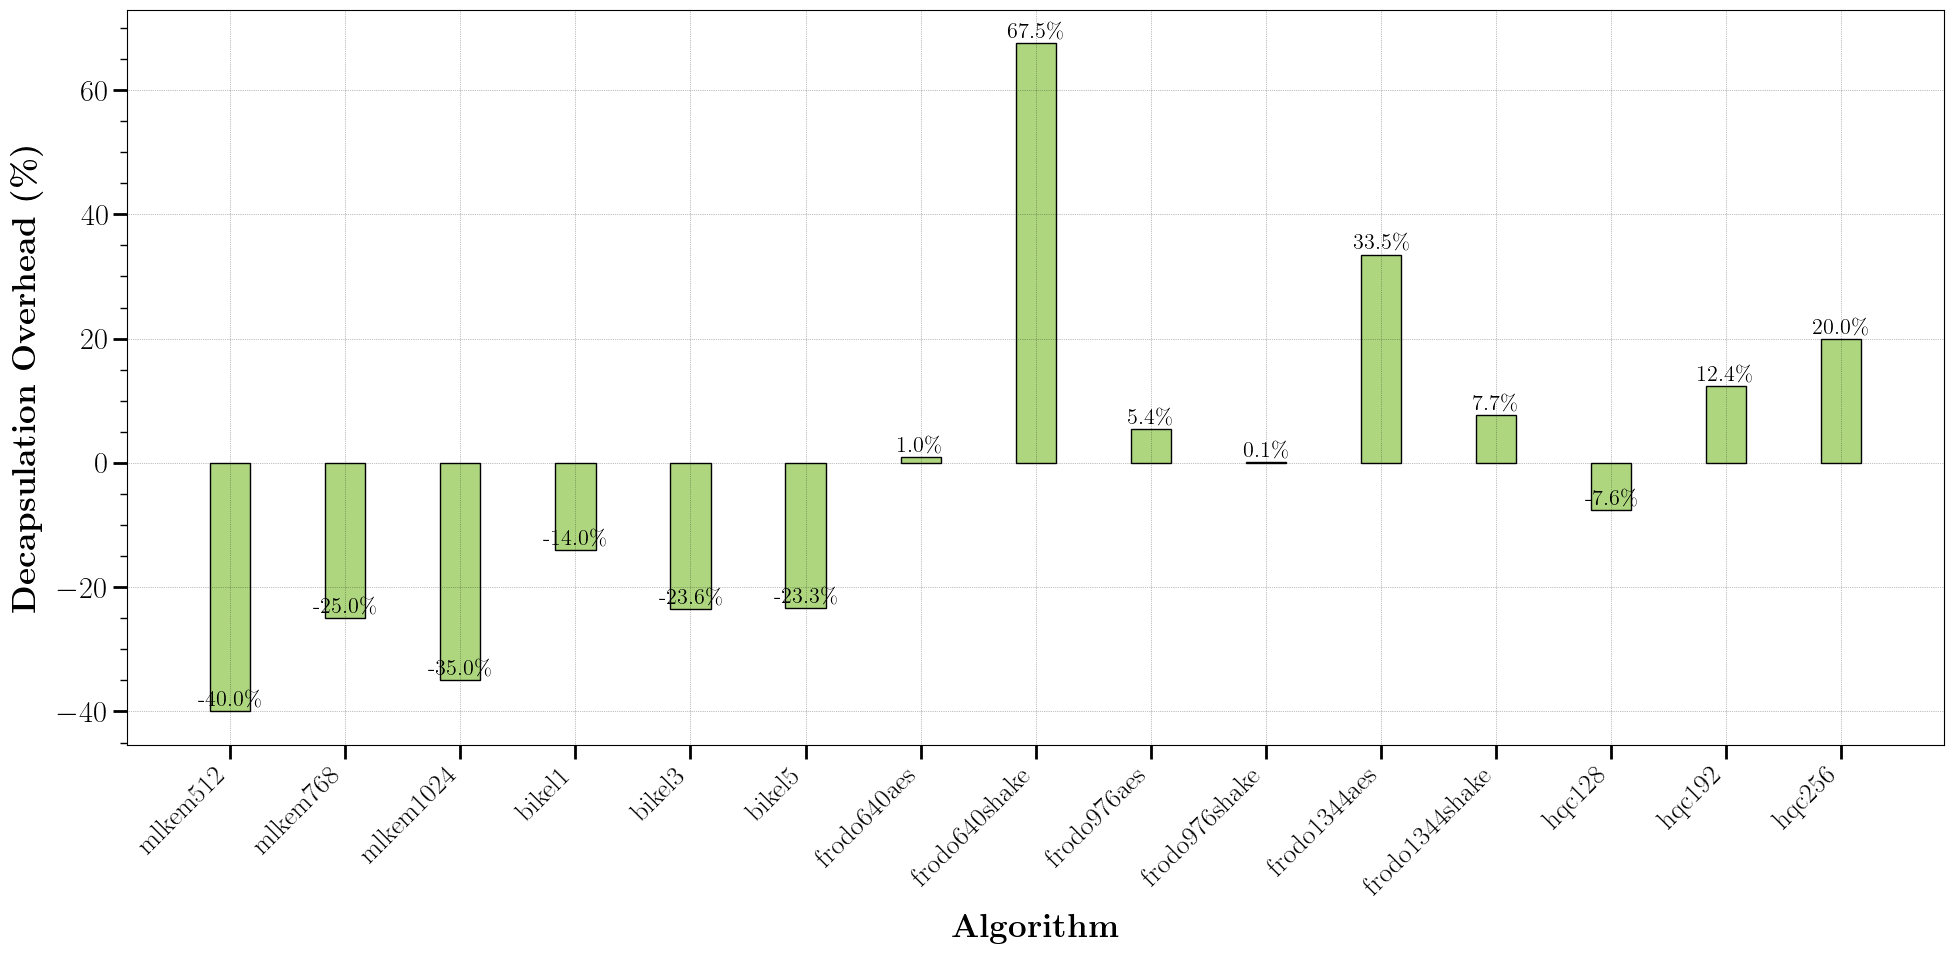

In [38]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=True, operation='Decaps(ms)', plot_title="kems_comparison_decapoverhead.pdf")

# Benchmarks - TLS

In [10]:
df_tls_kems = tls_data_summary("data/tls_bench_oqs_100_iter_20250127.csv")

df_tls_kems

Time_count  Time_mean  Time_std  Time_min  \
KEM       Cert                                                                
mlkem1024 falcon1024                     100     13.612     4.136      7.76   
          falcon512                      100     12.908     3.702      7.81   
          mldsa44                        100     12.824     3.589      7.33   
          mldsa65                        100     13.157     4.045      7.22   
          mldsa87                        100     13.290     3.885      7.89   
...                                      ...        ...       ...       ...   
hqc256    rsa_4096                       100     53.851     6.689     44.98   
          sphincssha2128fsimple          100     53.228     5.831     46.50   
          sphincssha2128ssimple          100    150.080     7.137    140.27   
          sphincssha2192fsimple          100     54.220     5.873     47.12   
          sphincsshake128fsimple         100     54.762     5.625     46.71   

                                  Time_max  
KEM       Cert                              
mlkem1024 falcon1024                 24.80  
          falcon512                  24.19  
          mldsa44                    21.90  
          mldsa65                    23.24  
          mldsa87                    23.66  
...                                    ...  
hqc256    rsa_4096                   76.28  
          sphincssha2128fsimple      70.08  
          sphincssha2128ssimple     182.08  
          sphincssha2192fsimple      68.70  
          sphincsshake128fsimple     71.79  

[180 rows x 5 columns]

In [11]:
df_tls_qkdkems = tls_data_summary("data/tls_bench_qkd_100_iter_20250127.csv")

df_tls_qkdkems

Time_count  Time_mean  Time_std  \
KEM           Cert                                                      
qkd_mlkem1024 falcon1024                     100     12.588     3.321   
              falcon512                      100     13.797     4.365   
              mldsa44                        100      8.847     1.789   
              mldsa65                        100     10.174     3.372   
              mldsa87                        100     13.555     3.954   
...                                          ...        ...       ...   
qkd_hqc256    rsa_4096                       100     52.789     6.256   
              sphincssha2128fsimple          100     53.984     5.979   
              sphincssha2128ssimple          100    150.735     6.760   
              sphincssha2192fsimple          100     54.932     6.428   
              sphincsshake128fsimple         100     56.009     6.574   

                                      Time_min  Time_max  
KEM           Cert                                        
qkd_mlkem1024 falcon1024                  7.97     22.49  
              falcon512                   7.81     23.99  
              mldsa44                     7.44     20.88  
              mldsa65                     7.41     21.68  
              mldsa87                     7.93     23.73  
...                                        ...       ...  
qkd_hqc256    rsa_4096                   45.38     70.51  
              sphincssha2128fsimple      46.18     69.06  
              sphincssha2128ssimple     141.44    168.34  
              sphincssha2192fsimple      47.03     75.17  
              sphincsshake128fsimple     46.92     72.87  

[180 rows x 5 columns]

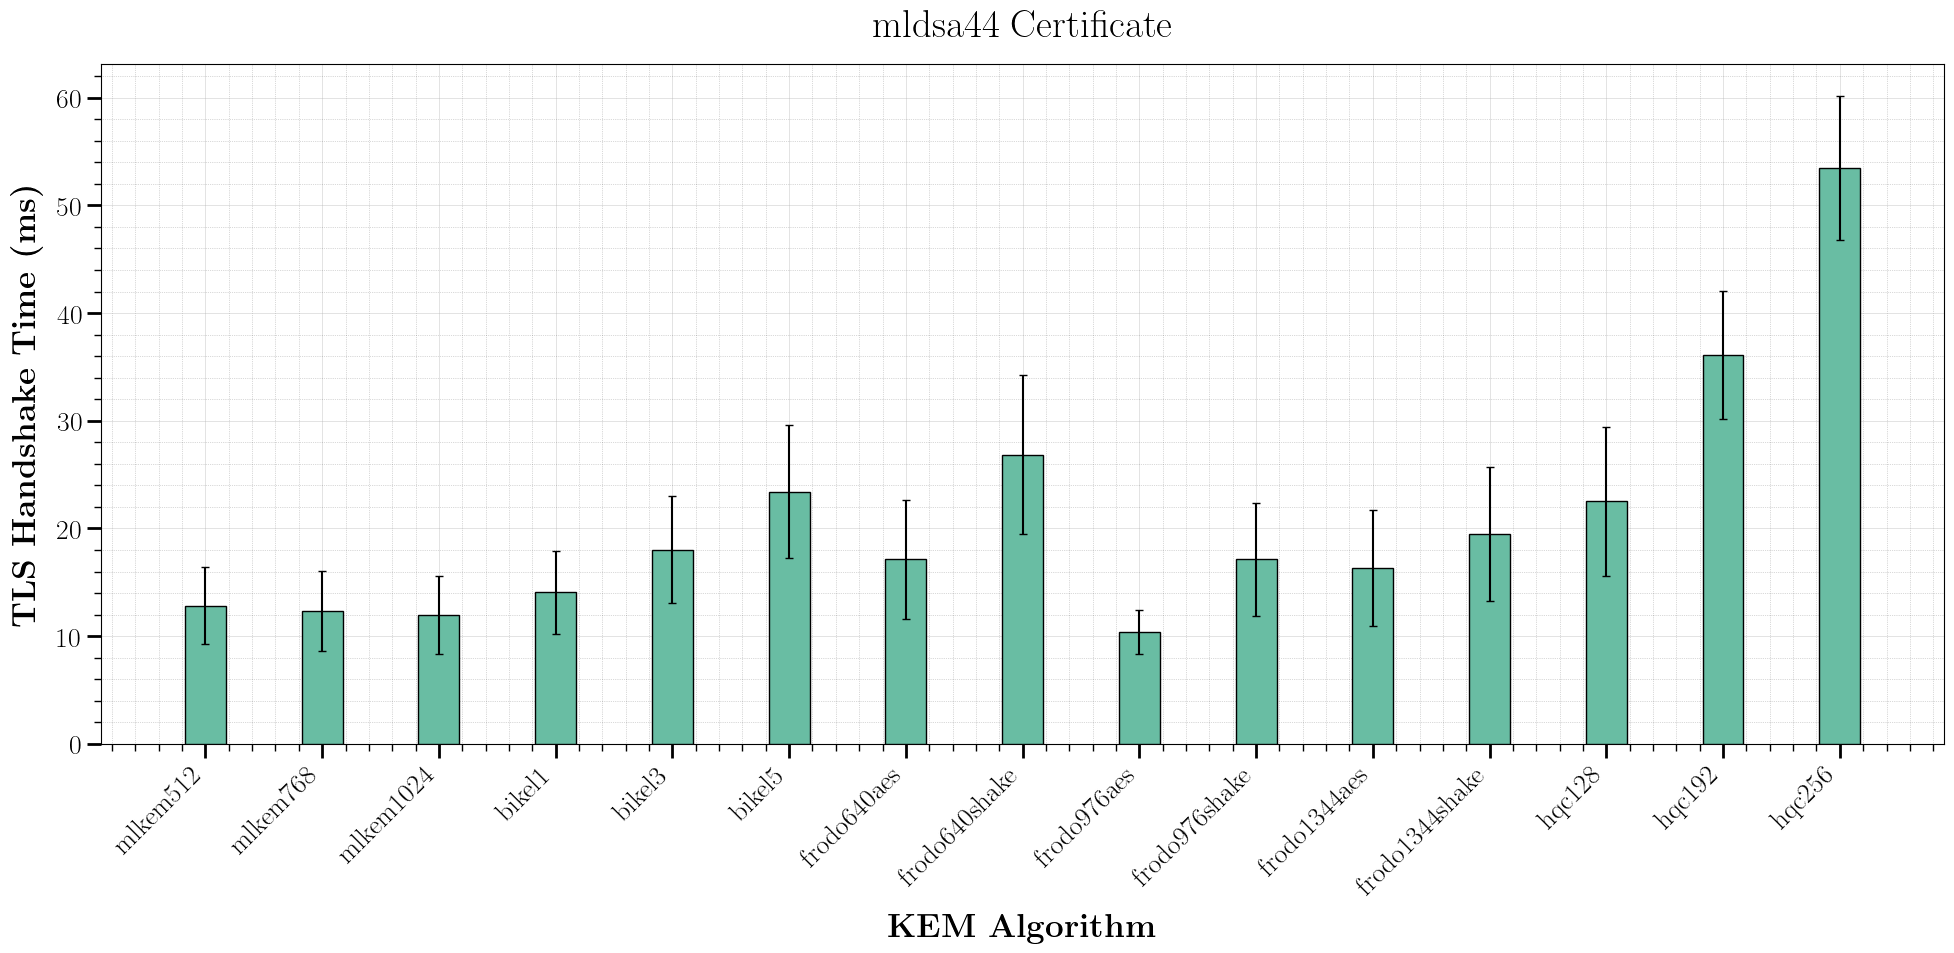

In [12]:
plot_tls_kem_families(input_df=df_tls_kems, cert_type='mldsa44', plot_title="tls_kems_100it_mldsa44.pdf")

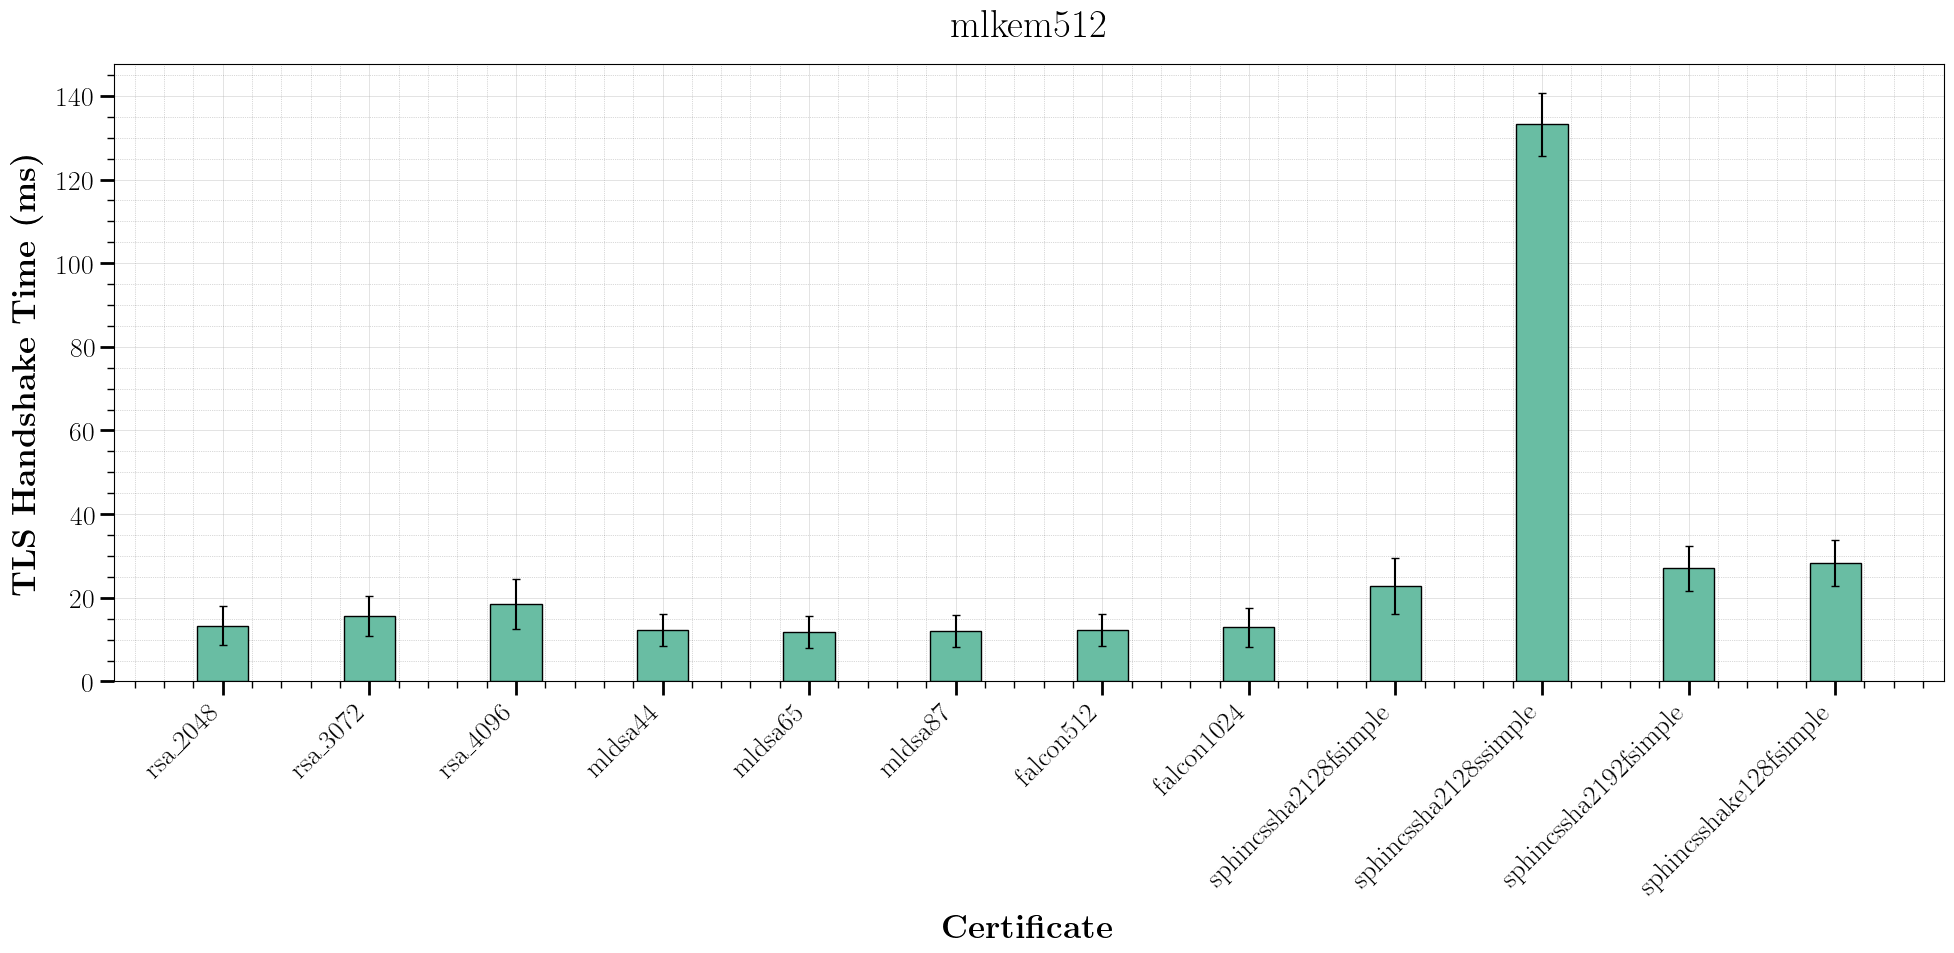

In [13]:
plot_tls_certs_families(input_df=df_tls_kems, kem_type='mlkem512', plot_title="tls_certs_100it_mlkem512.pdf")

In [14]:
merged_df = pd.concat([df_tls_kems, df_tls_qkdkems], keys=['OQS', 'QKD'], names=['Provider'])

merged_df

Time_count  Time_mean  Time_std  \
Provider KEM        Cert                                                      
OQS      mlkem1024  falcon1024                     100     13.612     4.136   
                    falcon512                      100     12.908     3.702   
                    mldsa44                        100     12.824     3.589   
                    mldsa65                        100     13.157     4.045   
                    mldsa87                        100     13.290     3.885   
...                                                ...        ...       ...   
QKD      qkd_hqc256 rsa_4096                       100     52.789     6.256   
                    sphincssha2128fsimple          100     53.984     5.979   
                    sphincssha2128ssimple          100    150.735     6.760   
                    sphincssha2192fsimple          100     54.932     6.428   
                    sphincsshake128fsimple         100     56.009     6.574   

                                            Time_min  Time_max  
Provider KEM        Cert                                        
OQS      mlkem1024  falcon1024                  7.76     24.80  
                    falcon512                   7.81     24.19  
                    mldsa44                     7.33     21.90  
                    mldsa65                     7.22     23.24  
                    mldsa87                     7.89     23.66  
...                                              ...       ...  
QKD      qkd_hqc256 rsa_4096                   45.38     70.51  
                    sphincssha2128fsimple      46.18     69.06  
                    sphincssha2128ssimple     141.44    168.34  
                    sphincssha2192fsimple      47.03     75.17  
                    sphincsshake128fsimple     46.92     72.87  

[360 rows x 5 columns]

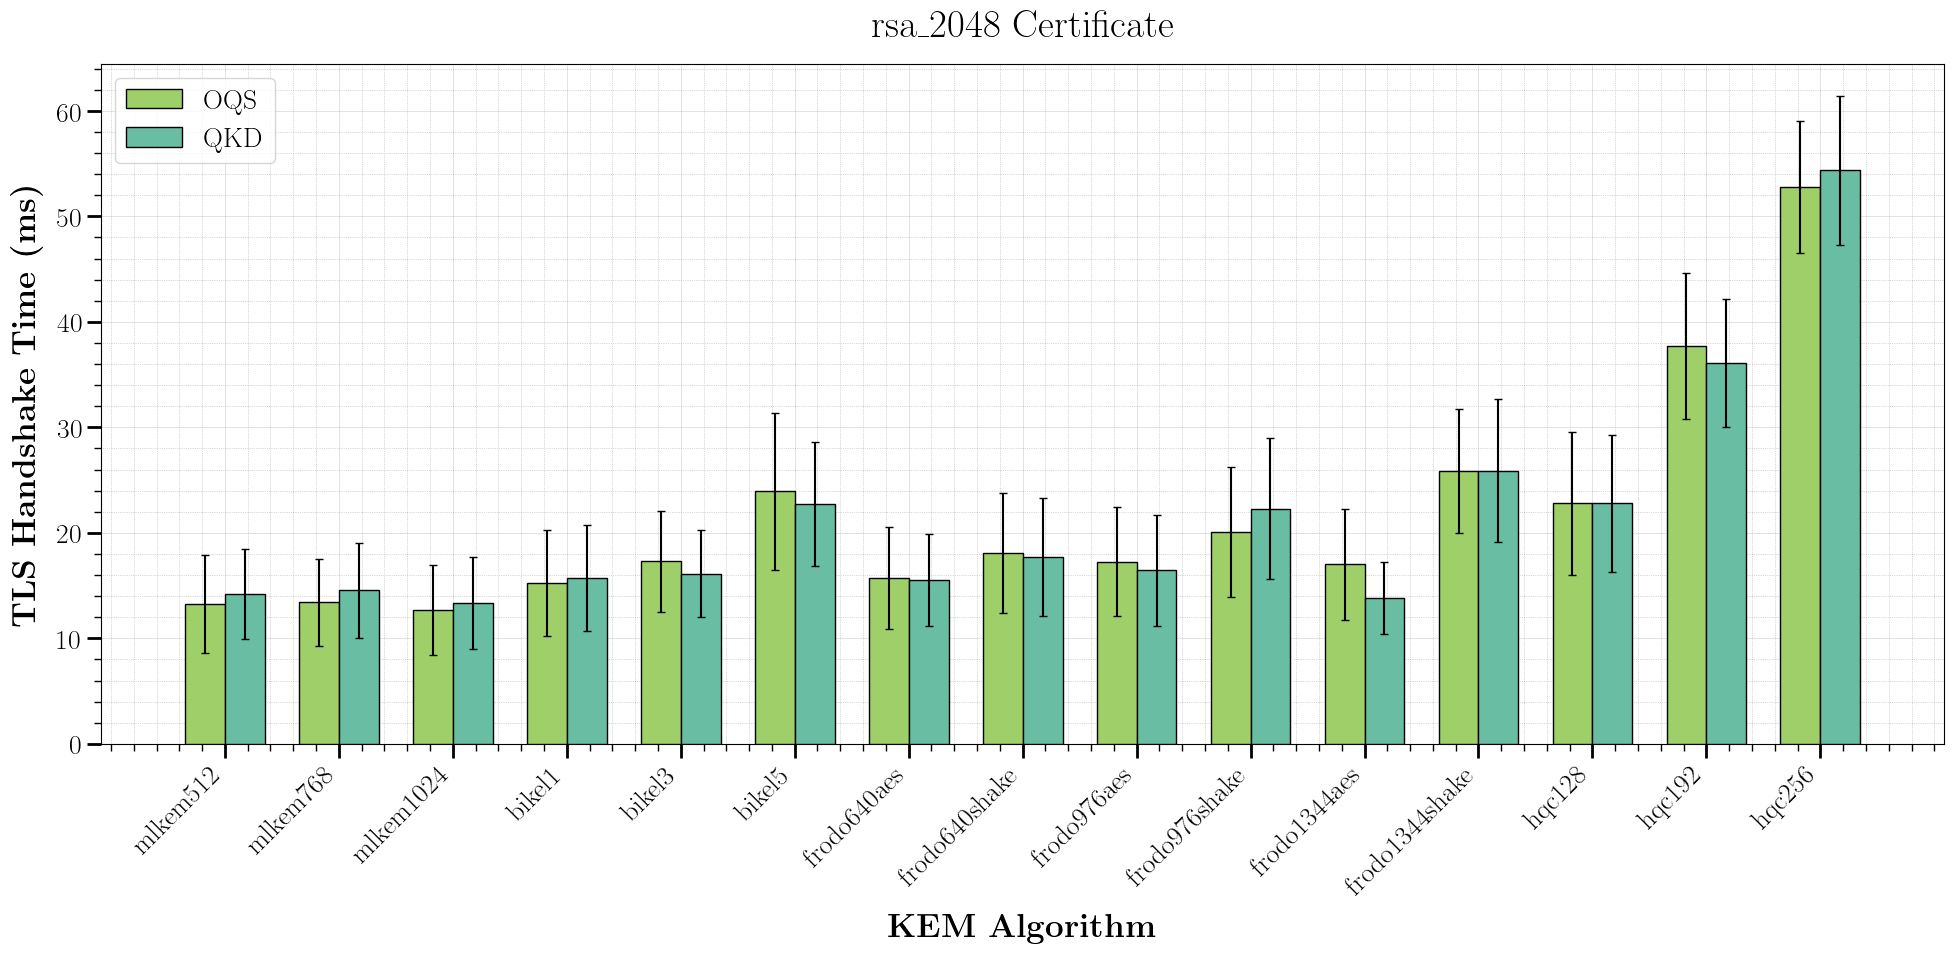

In [15]:
plot_tls_kem_families(input_df=merged_df, cert_type='rsa_2048', plot_title='tls_kems_comparison_100it_rsa2048.pdf')

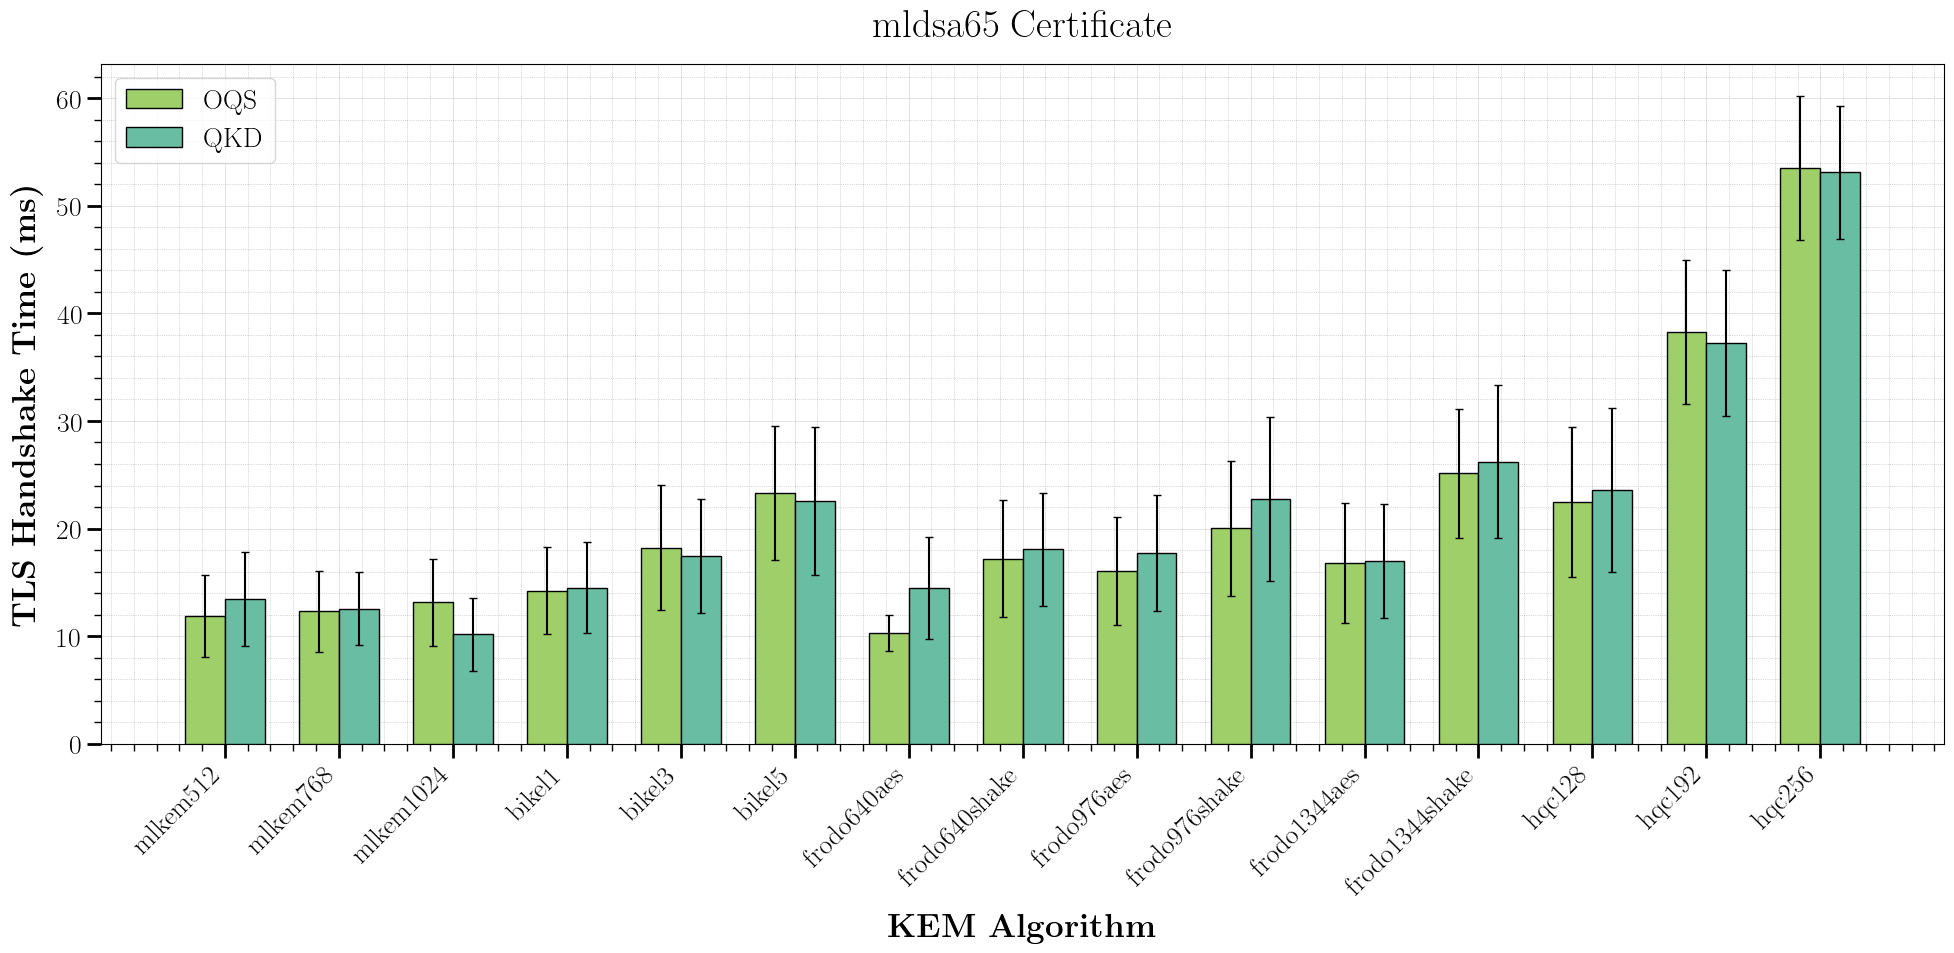

In [16]:
plot_tls_kem_families(input_df=merged_df, cert_type='mldsa65', plot_title='tls_kems_comparison_100it_mldsa65.pdf')